# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_excel("Customer Booking Data.xlsx")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

## Cleaning and Preprocessing data

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df['departure_city'] = df['route'].apply(lambda x: x[:3])
df['arrival_city'] = df['route'].apply(lambda x: x[3:])

In [8]:
df.describe(include='number')

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [9]:
df.describe(exclude='number')

,sales_channel,trip_type,route,booking_origin,departure_city,arrival_city
count,50000,50000,50000,50000,50000,50000
unique,2,3,799,104,85,64
top,Internet,RoundTrip,AKLKUL,Australia,DMK,SYD
freq,44382,49497,2680,17872,3747,6616


In [10]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
departure_city           0
arrival_city             0
dtype: int64

In [11]:
df.select_dtypes(include='object').head()

,sales_channel,trip_type,route,booking_origin,departure_city,arrival_city
0,Internet,RoundTrip,AKLDEL,New Zealand,AKL,DEL
1,Internet,RoundTrip,AKLDEL,New Zealand,AKL,DEL
2,Internet,RoundTrip,AKLDEL,India,AKL,DEL
3,Internet,RoundTrip,AKLDEL,New Zealand,AKL,DEL
4,Internet,RoundTrip,AKLDEL,India,AKL,DEL


In [12]:
df.duplicated().sum()

719

In [13]:
df=df.drop_duplicates()

## EDA

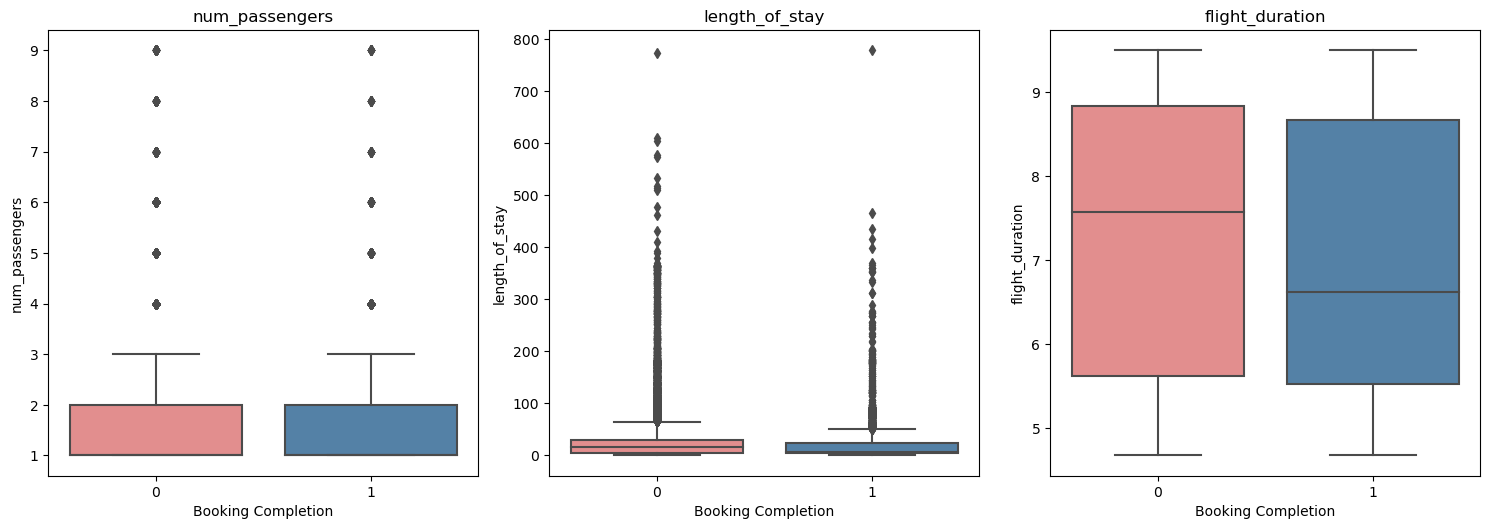

In [14]:
numerical_columns = ['num_passengers', 'length_of_stay', 'flight_duration']
plt.figure(figsize=(15, 10))
colors = ['lightcoral','steelblue']  

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='booking_complete', y=col, data=df, palette=colors)
    plt.title(f'{col}')
    plt.xlabel('Booking Completion')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### In the airline industry, it's common to allow round trip bookings up to one year in advance. However, in our dataset's length_of_stay column, there are entries indicating stays close to 800 days, which is significantly longer than the standard one-year timeframe. We will specifically investigate instances where the length_of_stay exceeds one year to better understand these anomalies and determine their relevance to our analysis.

In [15]:
len(df[df['length_of_stay']>365])

23

In [16]:
len(df[df['length_of_stay']<365])

49252

### In our dataset, we found 23 rows where the length_of_stay is much higher than normal. Since these cases are rare and can distort our analysis, it makes sense to leave them out. This way, our results will more accurately reflect the common trends in the data without being skewed by a few unusual cases.



In [17]:
df = df[df['length_of_stay']<365]

In [18]:
def visualize(column1,column2):
    display(df.groupby(column1)[column2].mean())
    plt.figure(figsize=(20,10))
    display(sns.barplot(x=df.groupby(column1)[column2].mean().index, 
                        y=df.groupby(column1)[column2].mean().values))
    plt.title(f'{column1} vs {column2}')
    plt.xticks(rotation=90)
    plt.show()

booking_origin
(not set)               1.705128
Afghanistan             1.000000
Algeria                 1.000000
Argentina               1.500000
Australia               1.446688
                          ...   
United Arab Emirates    1.428571
United Kingdom          1.485549
United States           1.428256
Vanuatu                 1.000000
Vietnam                 1.329016
Name: num_passengers, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

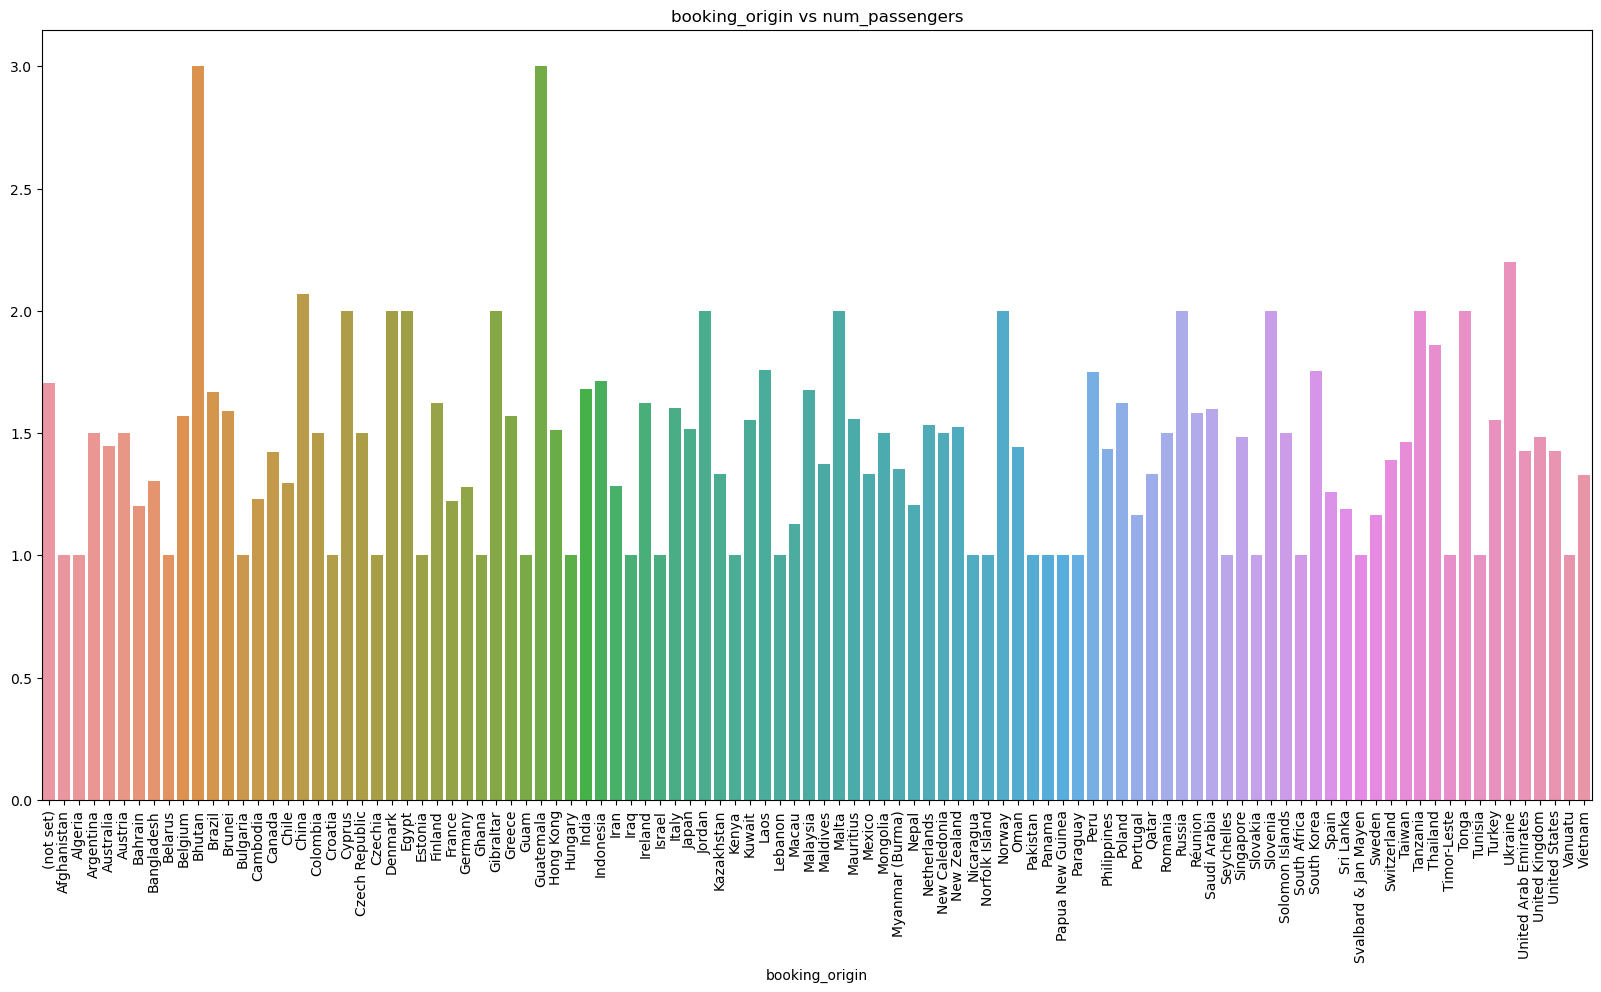

In [19]:
visualize('booking_origin','num_passengers')

### Most bookings for higher number of passenger was from Brotain and Guatemala

booking_origin
(not set)                79.038462
Afghanistan             191.000000
Algeria                  27.000000
Argentina                80.333333
Australia                78.553764
                           ...    
United Arab Emirates     55.928571
United Kingdom           78.624277
United States            69.878587
Vanuatu                  11.000000
Vietnam                  69.536269
Name: purchase_lead, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

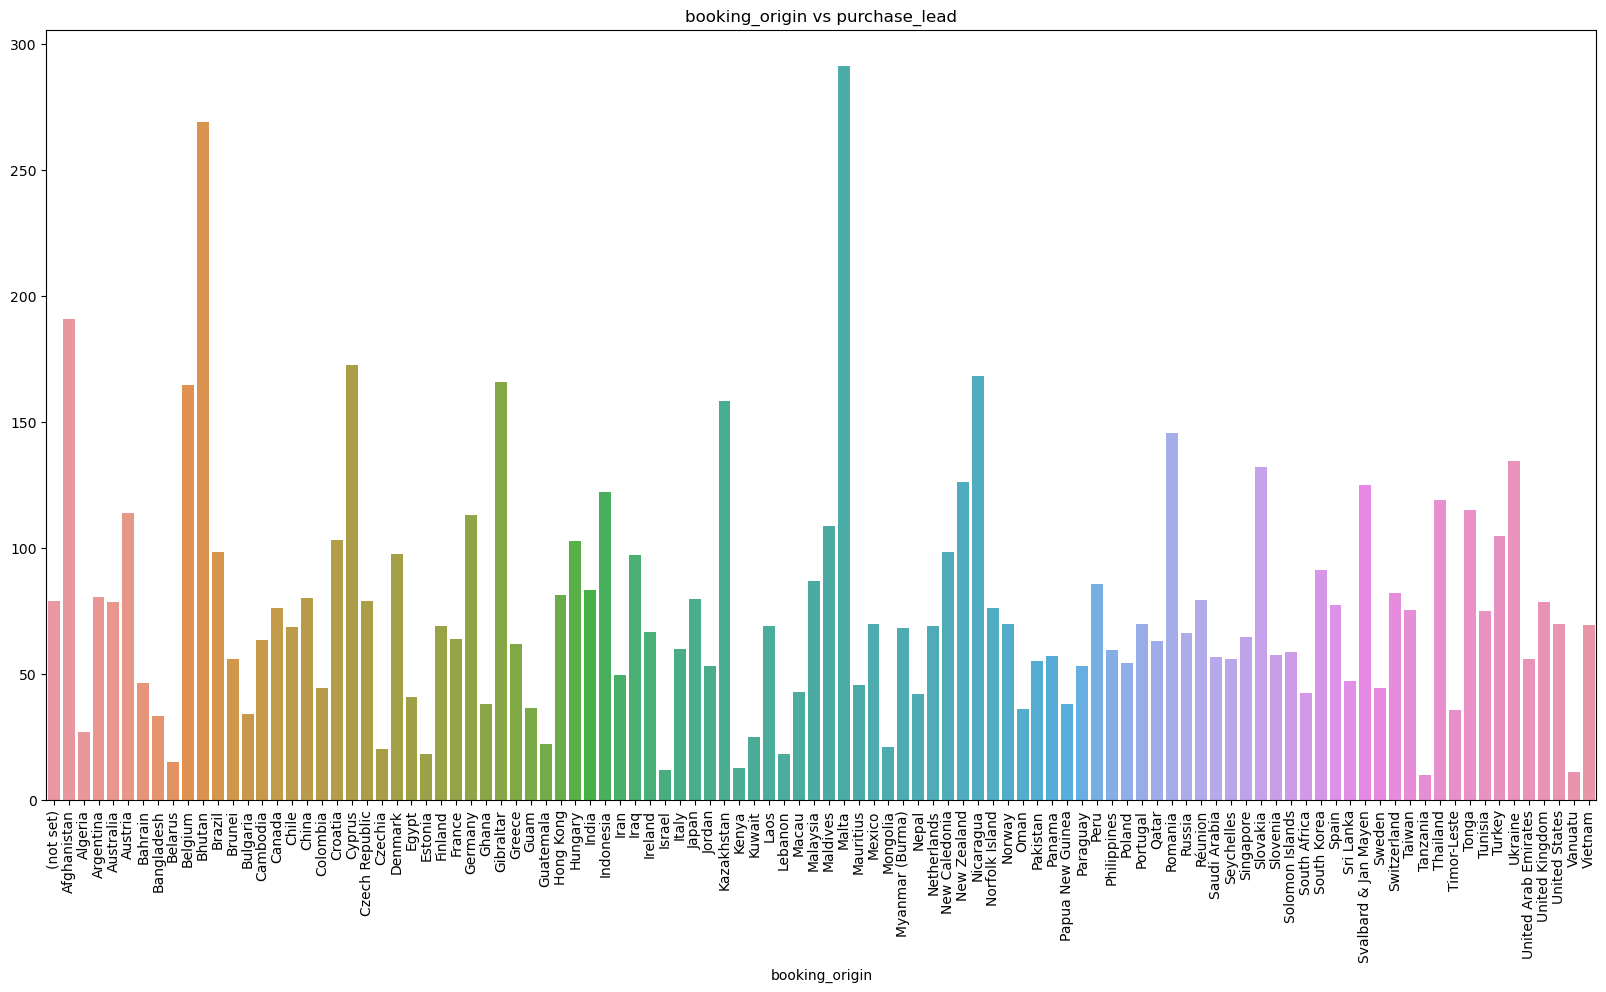

In [20]:
visualize('booking_origin','purchase_lead')

## Most purchase leads on Average were from Malta followed by Britain

booking_origin
(not set)               18.012821
Afghanistan              2.000000
Algeria                  6.000000
Argentina               27.333333
Australia               28.817128
                          ...    
United Arab Emirates    26.285714
United Kingdom          23.895954
United States           18.459161
Vanuatu                  4.000000
Vietnam                 32.927461
Name: length_of_stay, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

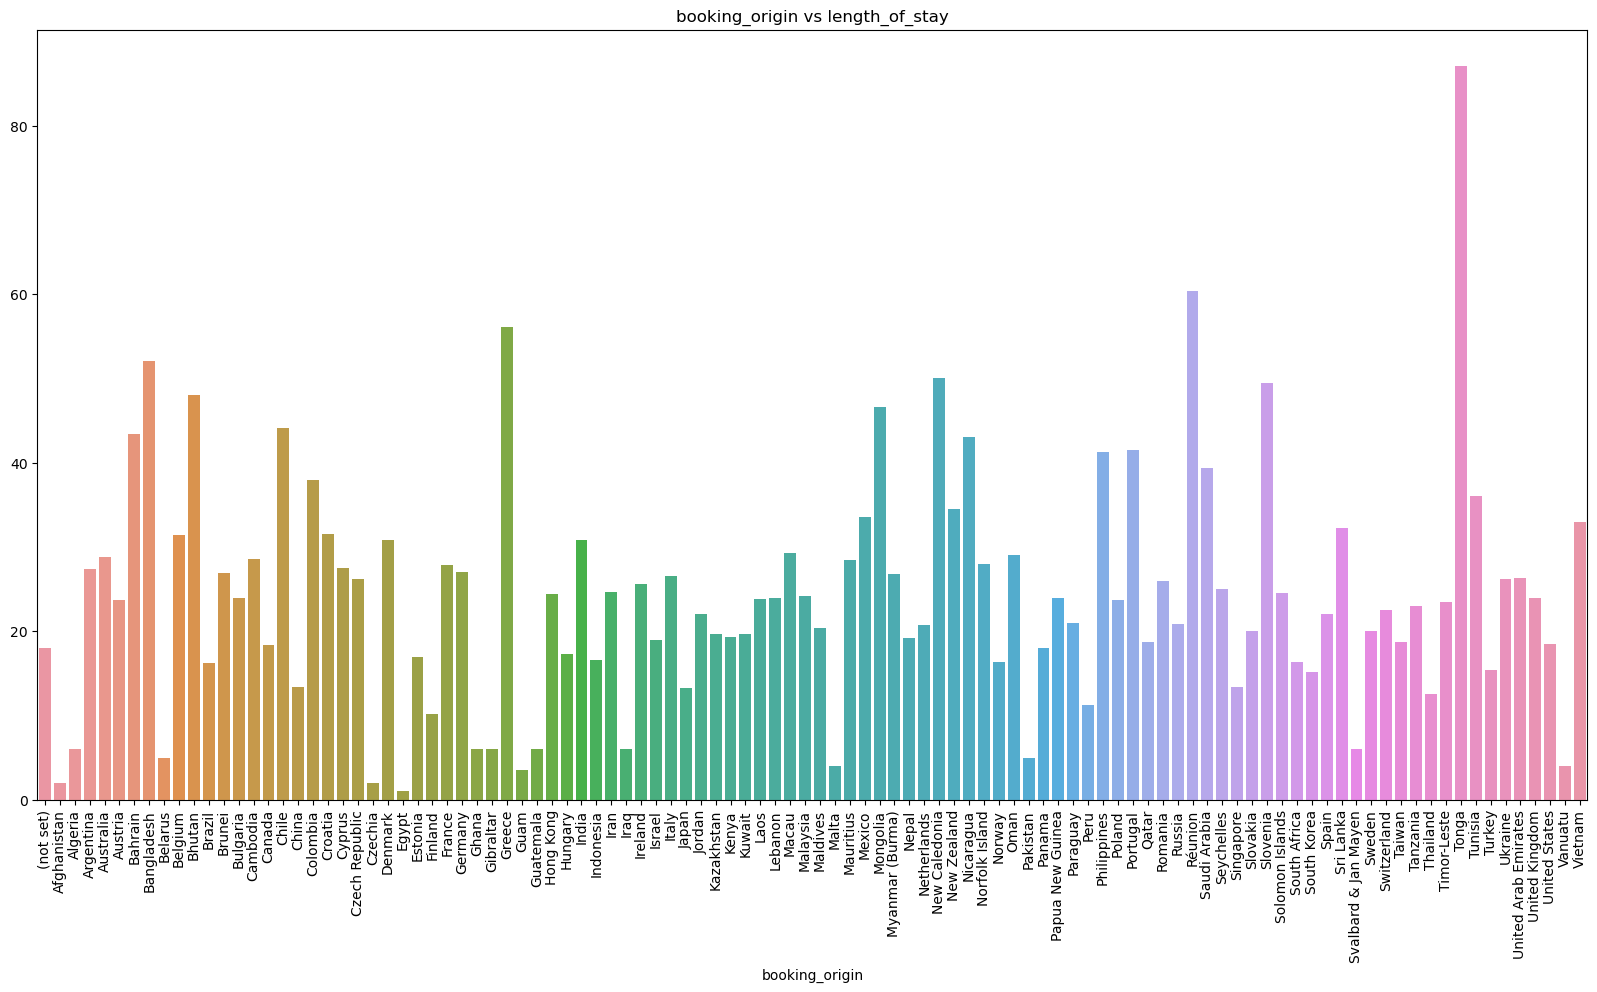

In [21]:
visualize('booking_origin','length_of_stay')

## Longest Length of stay on Average was for Bookings from Tonga

booking_origin
(not set)               0.628205
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.166667
Australia               0.700605
                          ...   
United Arab Emirates    0.642857
United Kingdom          0.693642
United States           0.560706
Vanuatu                 1.000000
Vietnam                 0.722798
Name: wants_extra_baggage, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

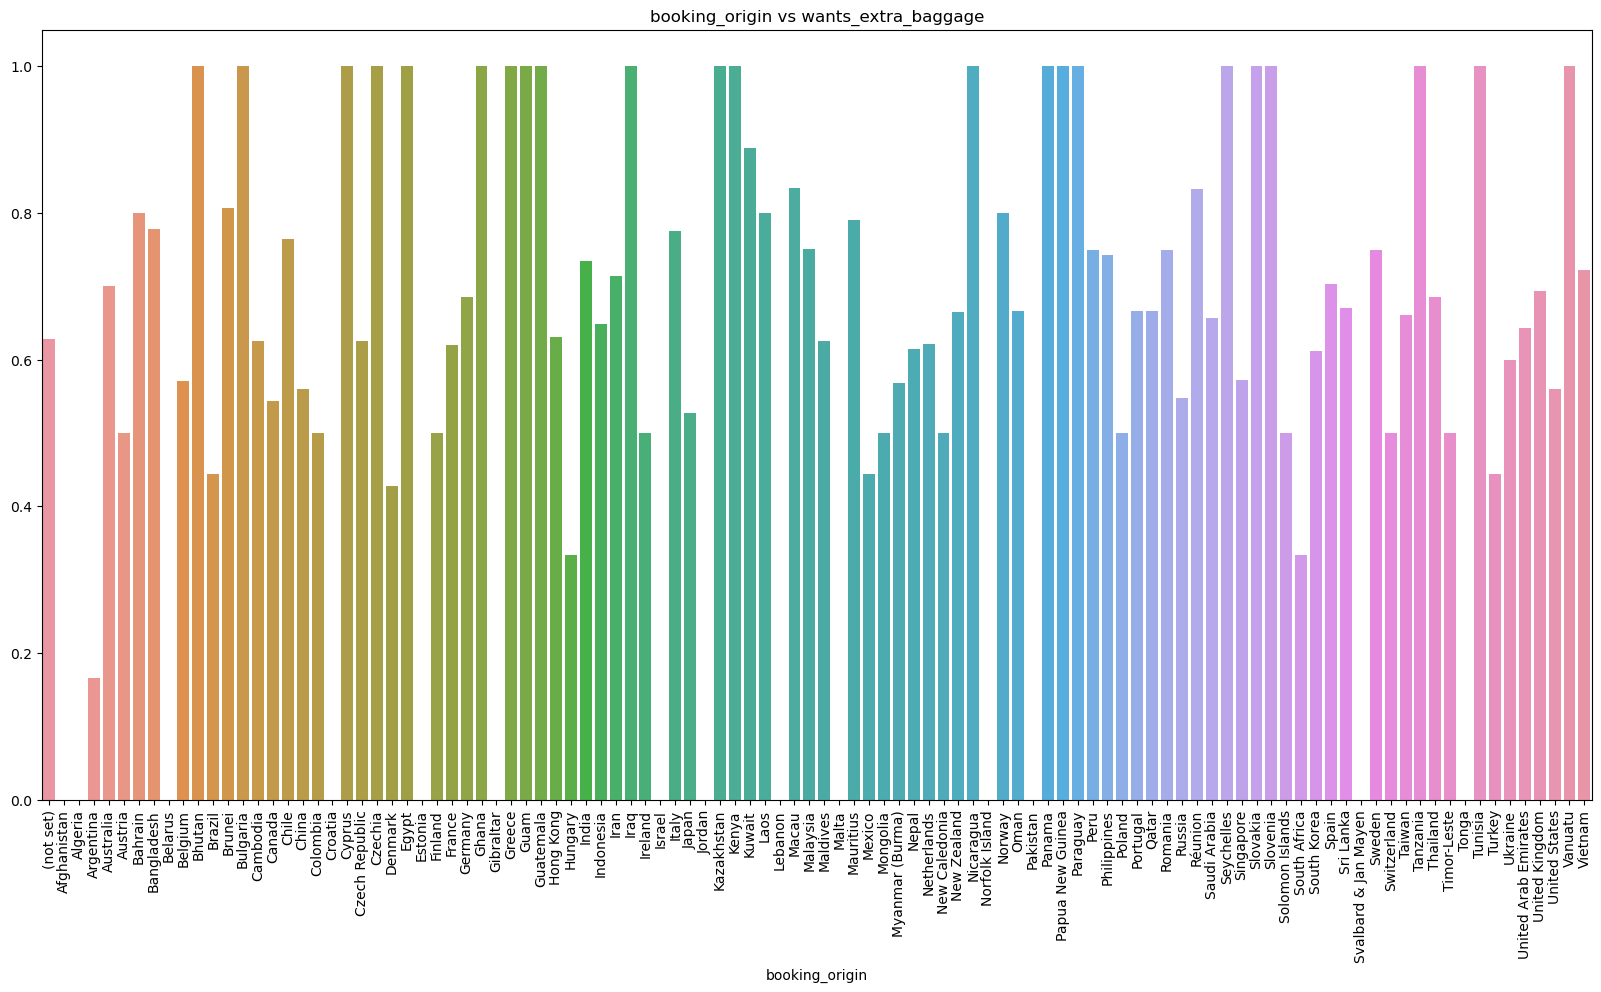

In [22]:
visualize('booking_origin','wants_extra_baggage')

## People from Afghanistan, Algeria, Belarus, Croatia, Estonia, Gibraltar, Israel , Jordan, Lebanon, Malta, Pakistan and Tonga Do not want Extra Baggage

booking_origin
(not set)               0.243590
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.166667
Australia               0.341988
                          ...   
United Arab Emirates    0.357143
United Kingdom          0.323699
United States           0.273731
Vanuatu                 1.000000
Vietnam                 0.274611
Name: wants_preferred_seat, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

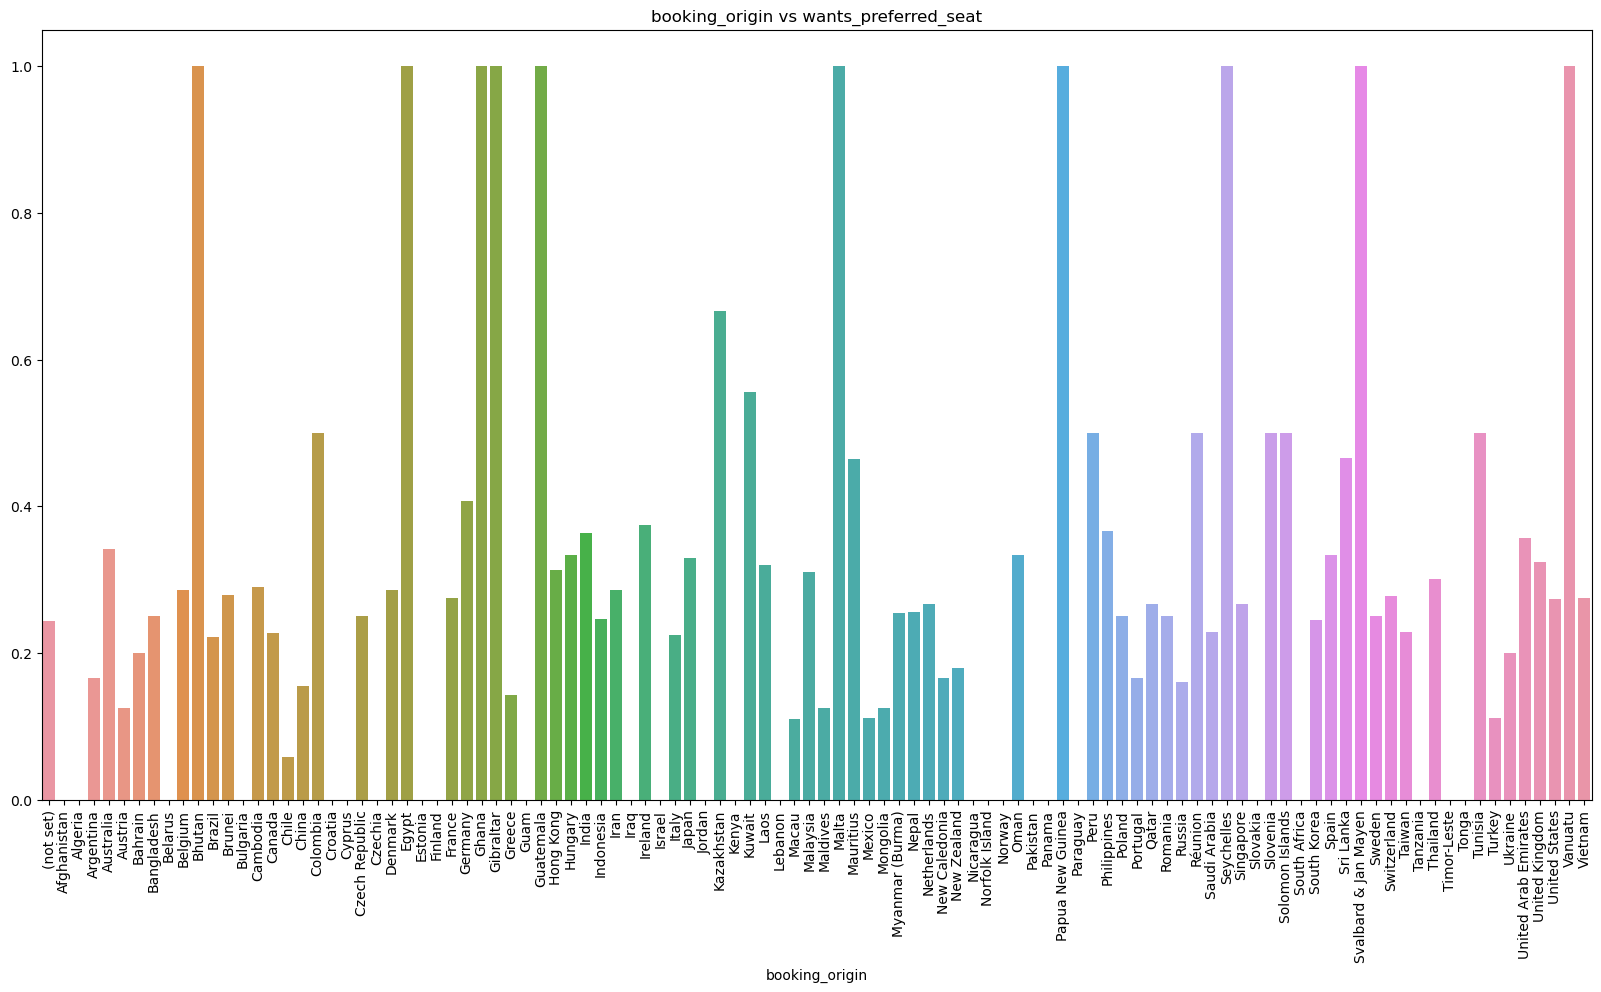

In [23]:
visualize('booking_origin','wants_preferred_seat')

## Customers from Britain, Egypt, Ghana, Gibraltar, Guatemala, Malta, Papua New Guinea, Seychelles and Vanuatu Are Quite Picky about the Seats they want

booking_origin
(not set)               0.333333
Afghanistan             0.000000
Algeria                 1.000000
Argentina               0.000000
Australia               0.506929
                          ...   
United Arab Emirates    0.595238
United Kingdom          0.393064
United States           0.315673
Vanuatu                 0.000000
Vietnam                 0.375648
Name: wants_in_flight_meals, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

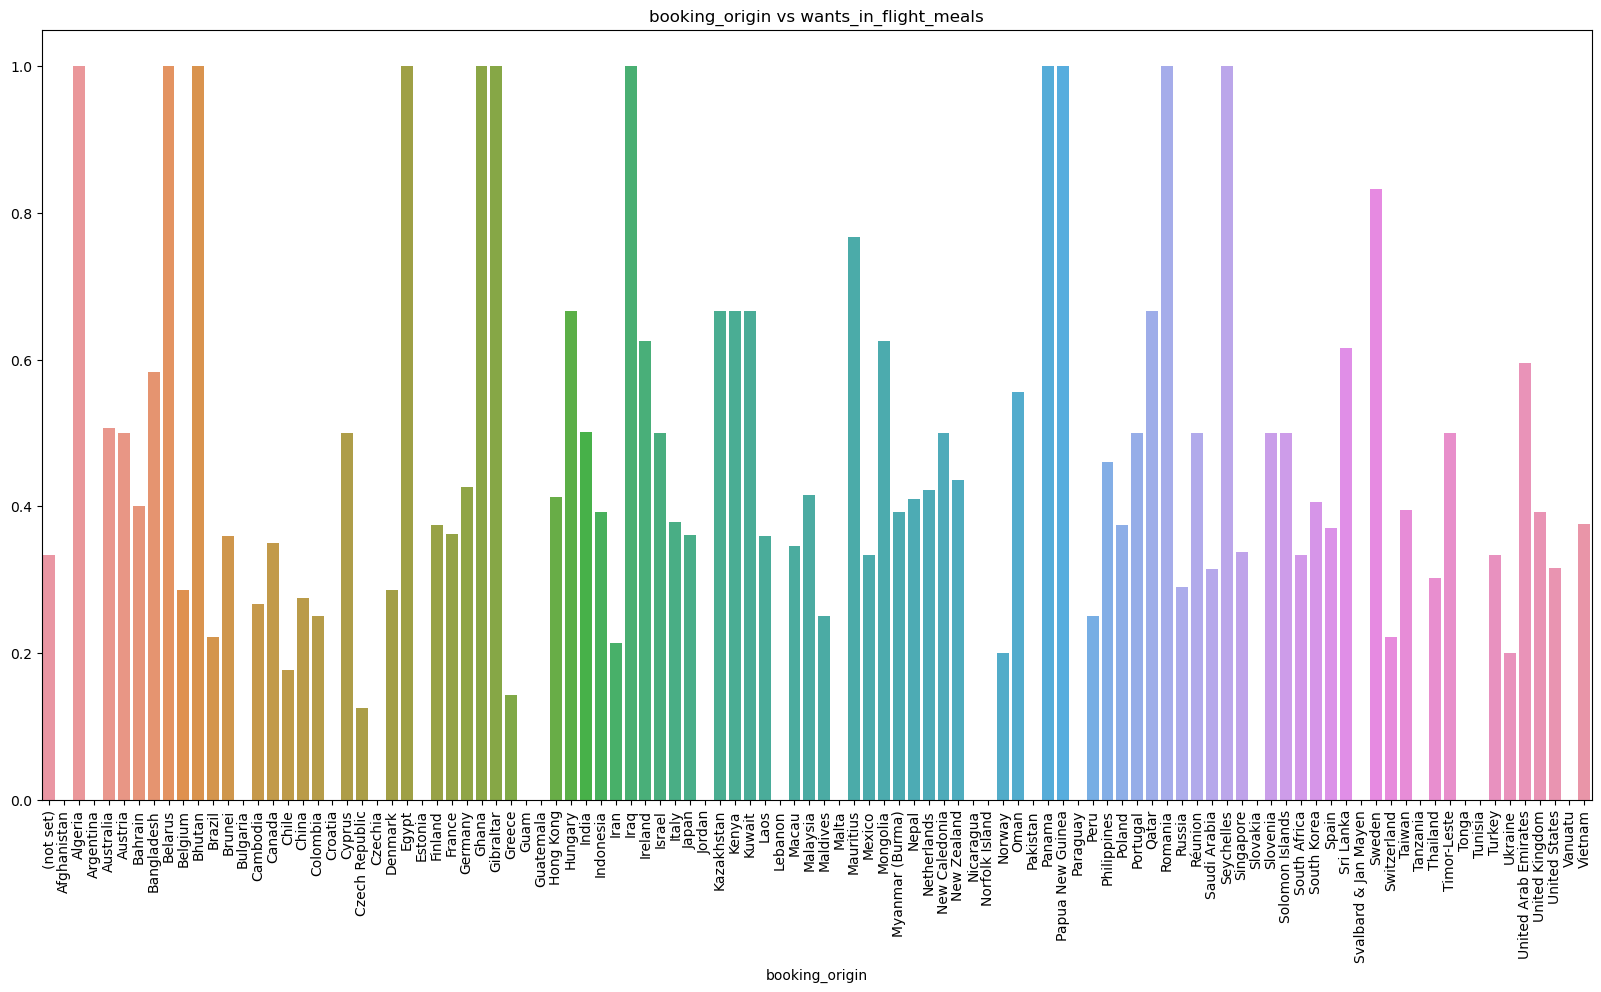

In [24]:
visualize('booking_origin','wants_in_flight_meals')

booking_origin
(not set)               6.751282
Afghanistan             4.750000
Algeria                 6.620000
Argentina               7.576667
Australia               7.969001
                          ...   
United Arab Emirates    7.699048
United Kingdom          7.450809
United States           6.878786
Vanuatu                 8.580000
Vietnam                 7.989456
Name: flight_duration, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

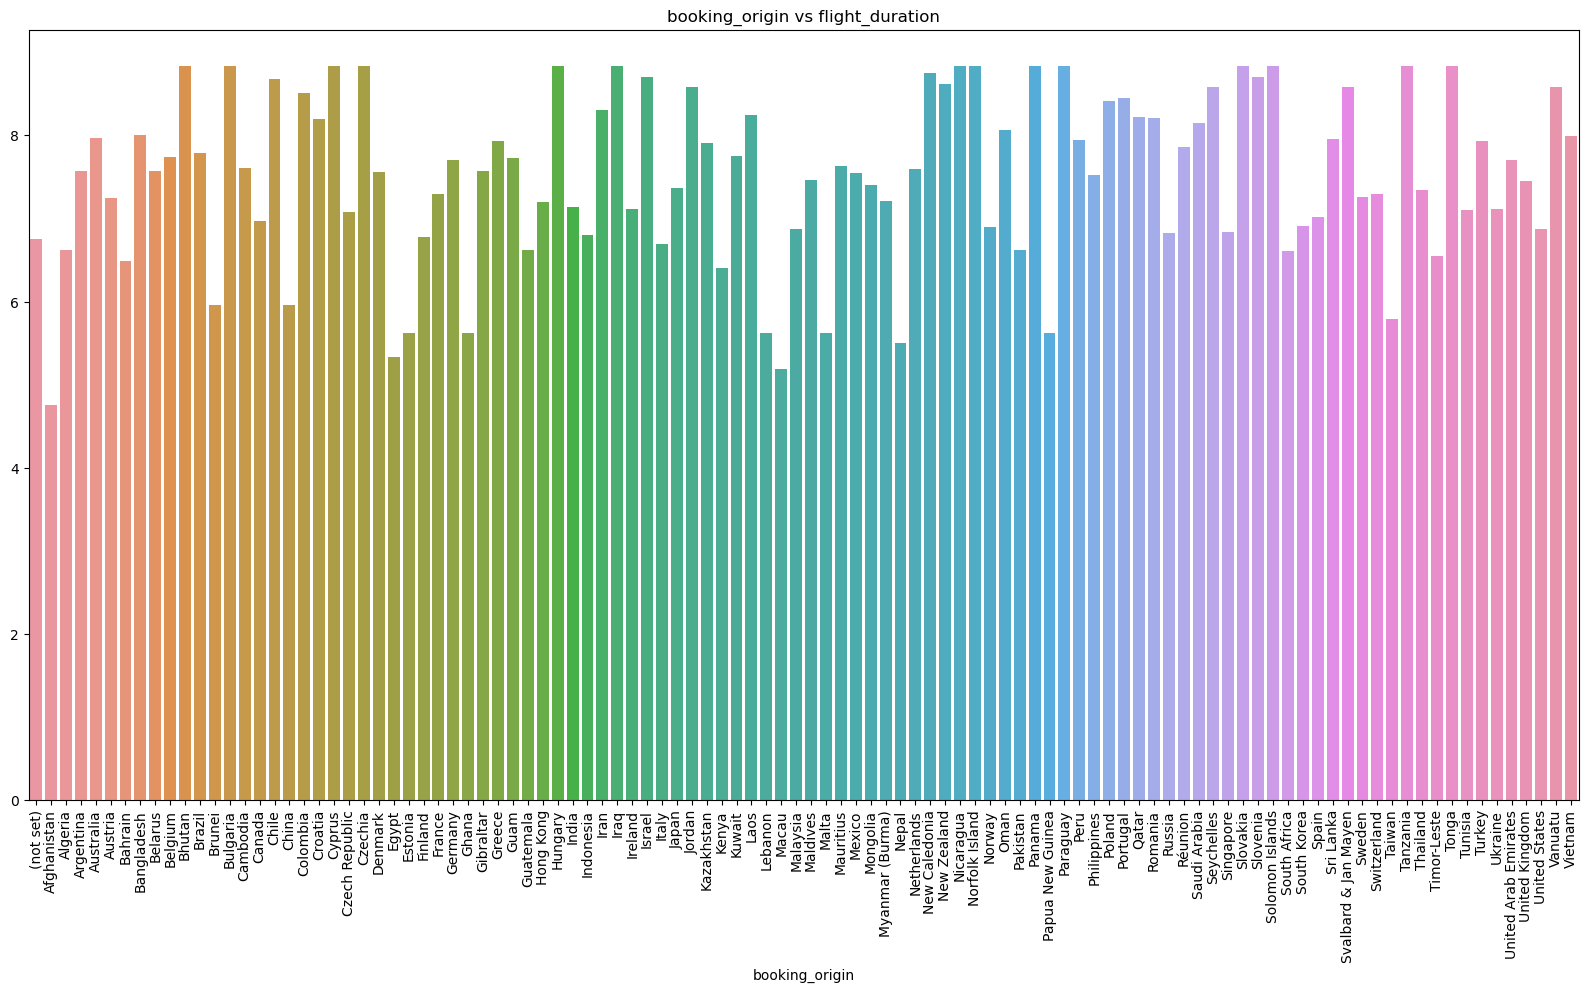

In [25]:
visualize('booking_origin','flight_duration')

booking_origin
(not set)               0.179487
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.000000
Australia               0.050512
                          ...   
United Arab Emirates    0.071429
United Kingdom          0.121387
United States           0.183223
Vanuatu                 1.000000
Vietnam                 0.295337
Name: booking_complete, Length: 104, dtype: float64

<Axes: xlabel='booking_origin'>

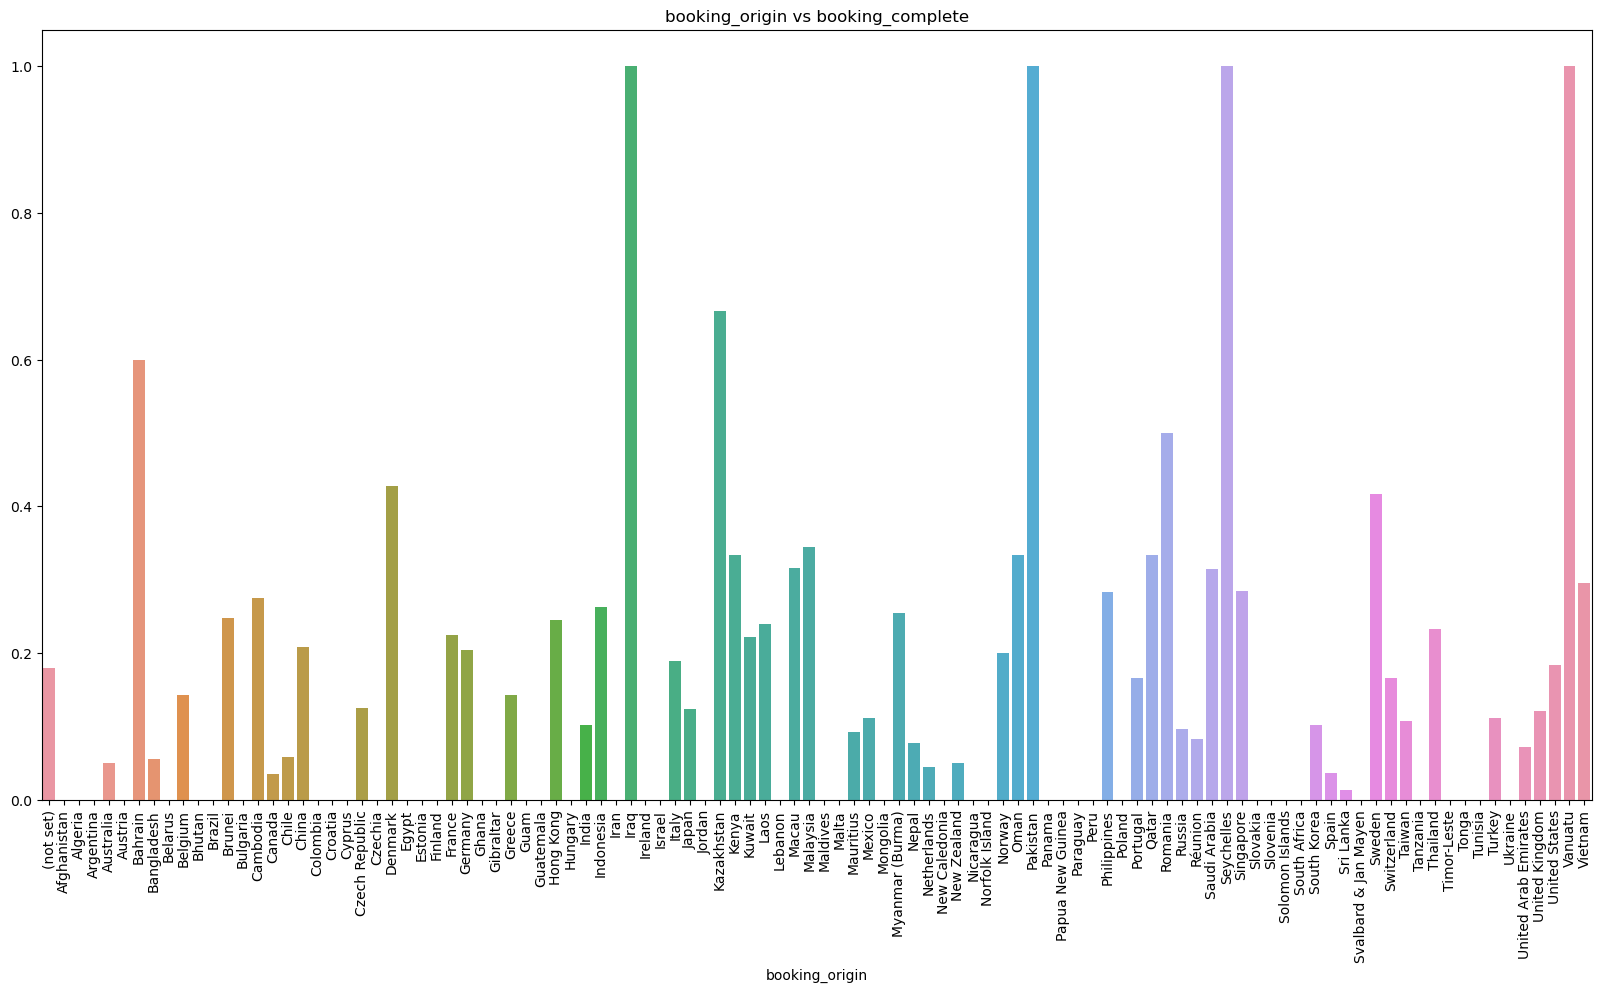

In [26]:
visualize('booking_origin','booking_complete')

## Iraq, Pakistan, Seychelles and Vanuata are the only places with all customers completing their booking

flight_day
1    1.596542
2    1.571164
3    1.575717
4    1.577207
5    1.557318
6    1.614685
7    1.650614
Name: num_passengers, dtype: float64

<Axes: xlabel='flight_day'>

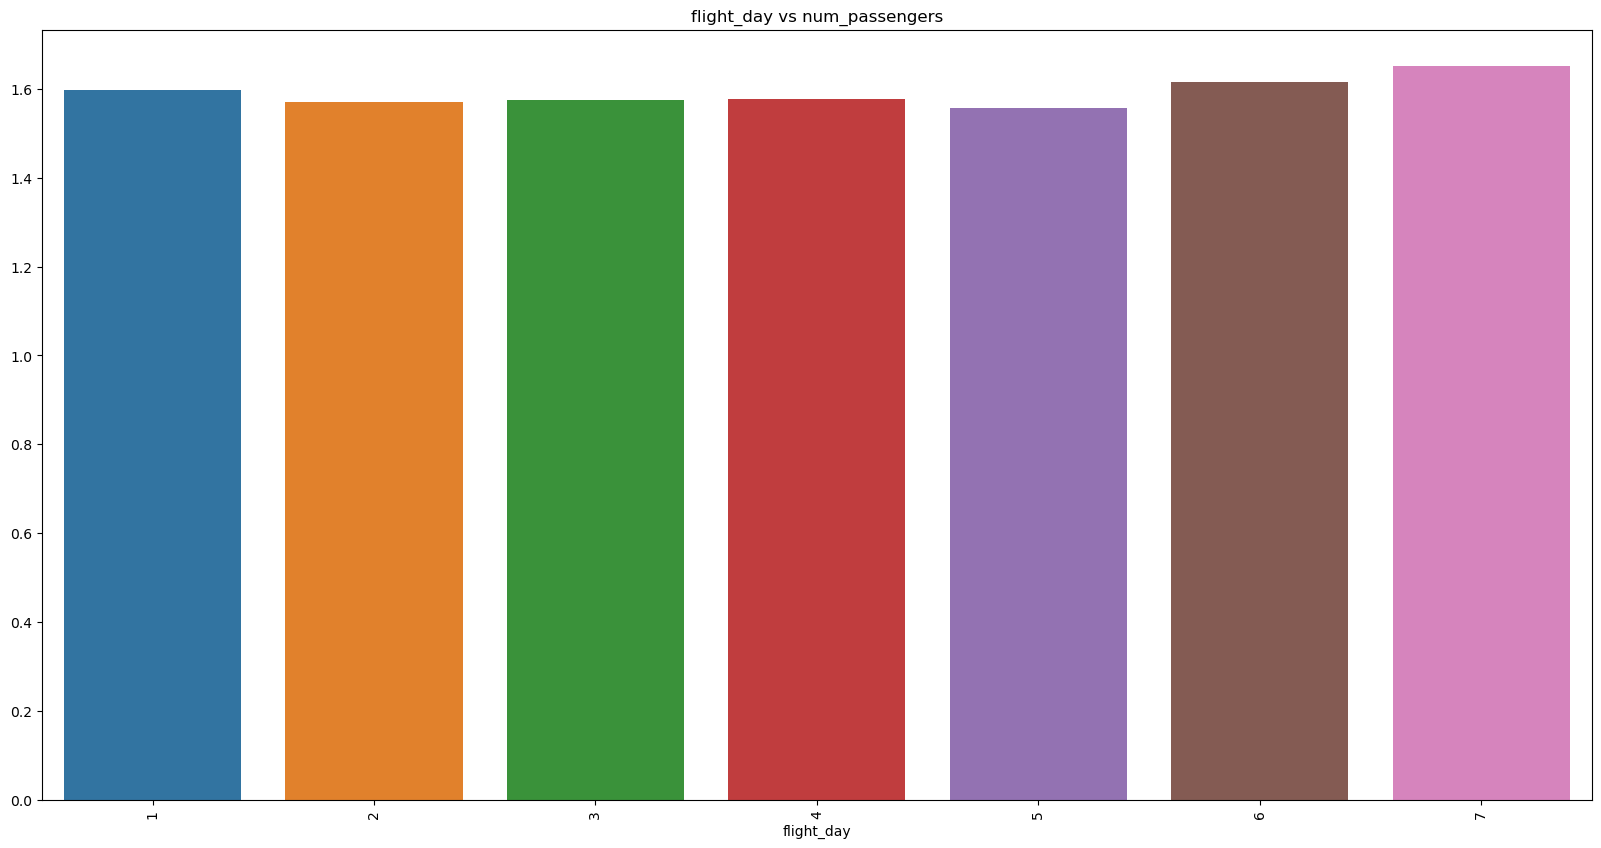

In [27]:
visualize('flight_day','num_passengers')

flight_day
1    22.134820
2    23.069774
3    22.938103
4    23.122848
5    23.108051
6    22.901049
7    22.308840
Name: length_of_stay, dtype: float64

<Axes: xlabel='flight_day'>

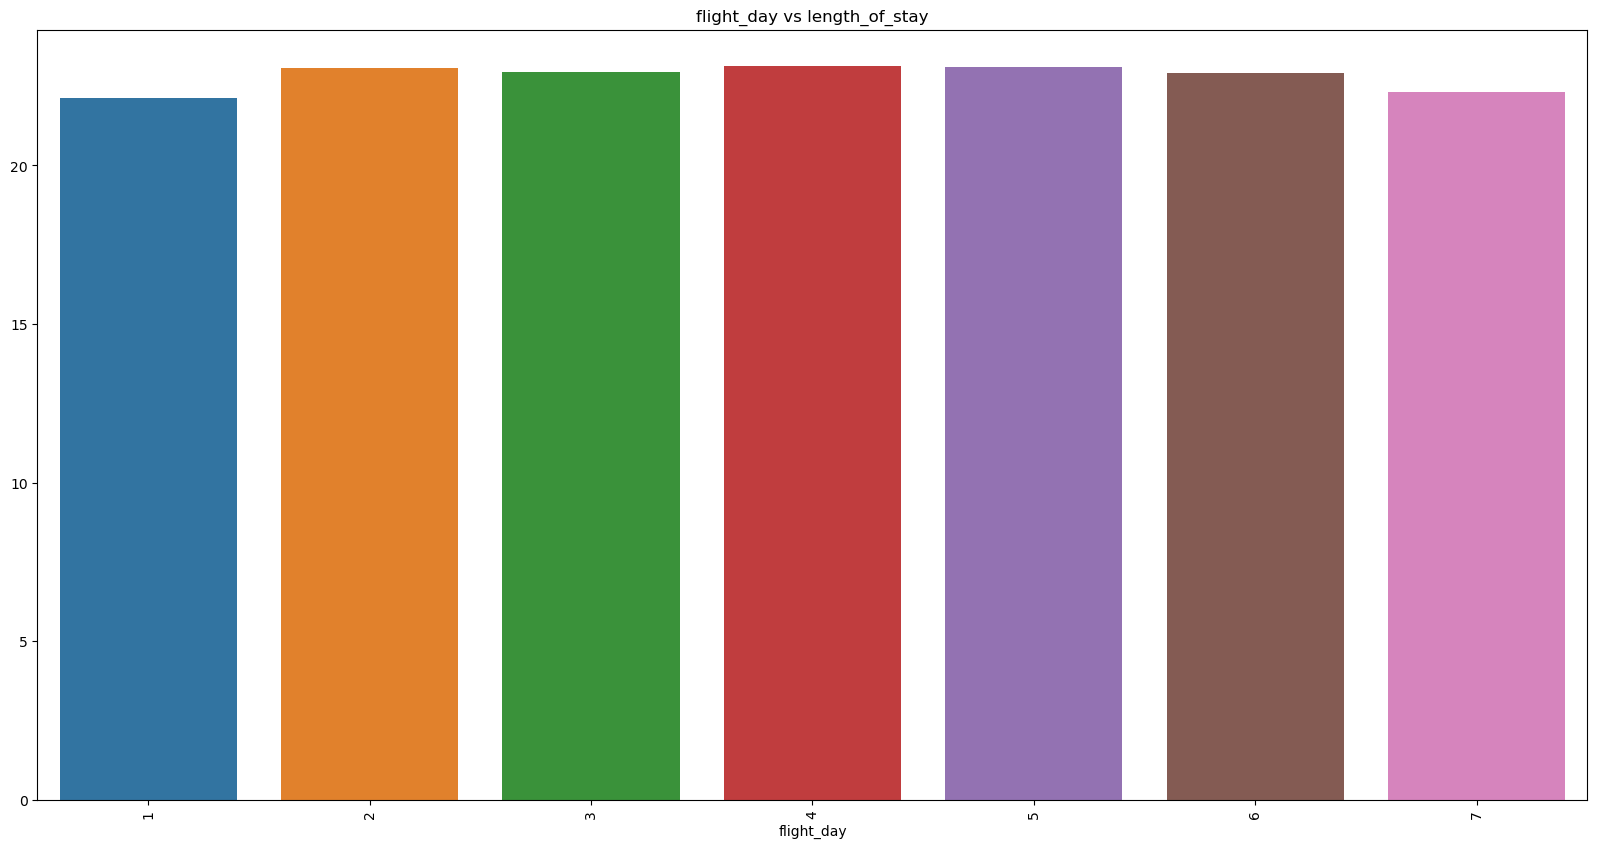

In [28]:
visualize('flight_day','length_of_stay')

flight_day
1    0.662824
2    0.672978
3    0.671737
4    0.671768
5    0.667016
6    0.673252
7    0.657604
Name: wants_extra_baggage, dtype: float64

<Axes: xlabel='flight_day'>

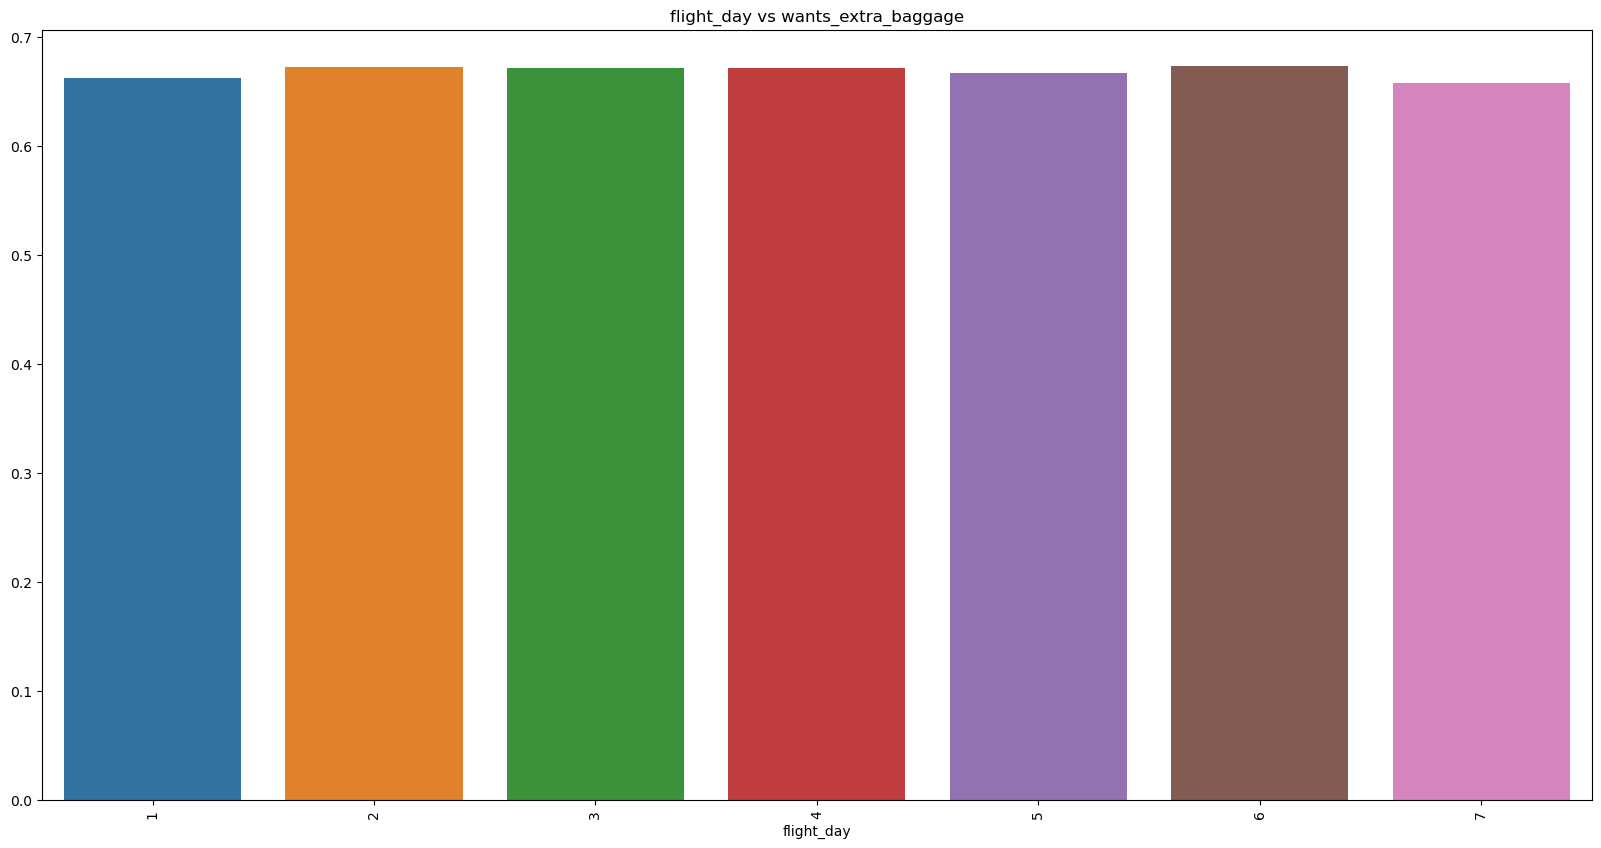

In [29]:
visualize('flight_day','wants_extra_baggage')

flight_day
1    0.422503
2    0.417582
3    0.424944
4    0.431129
5    0.431607
6    0.432692
7    0.427994
Name: wants_in_flight_meals, dtype: float64

<Axes: xlabel='flight_day'>

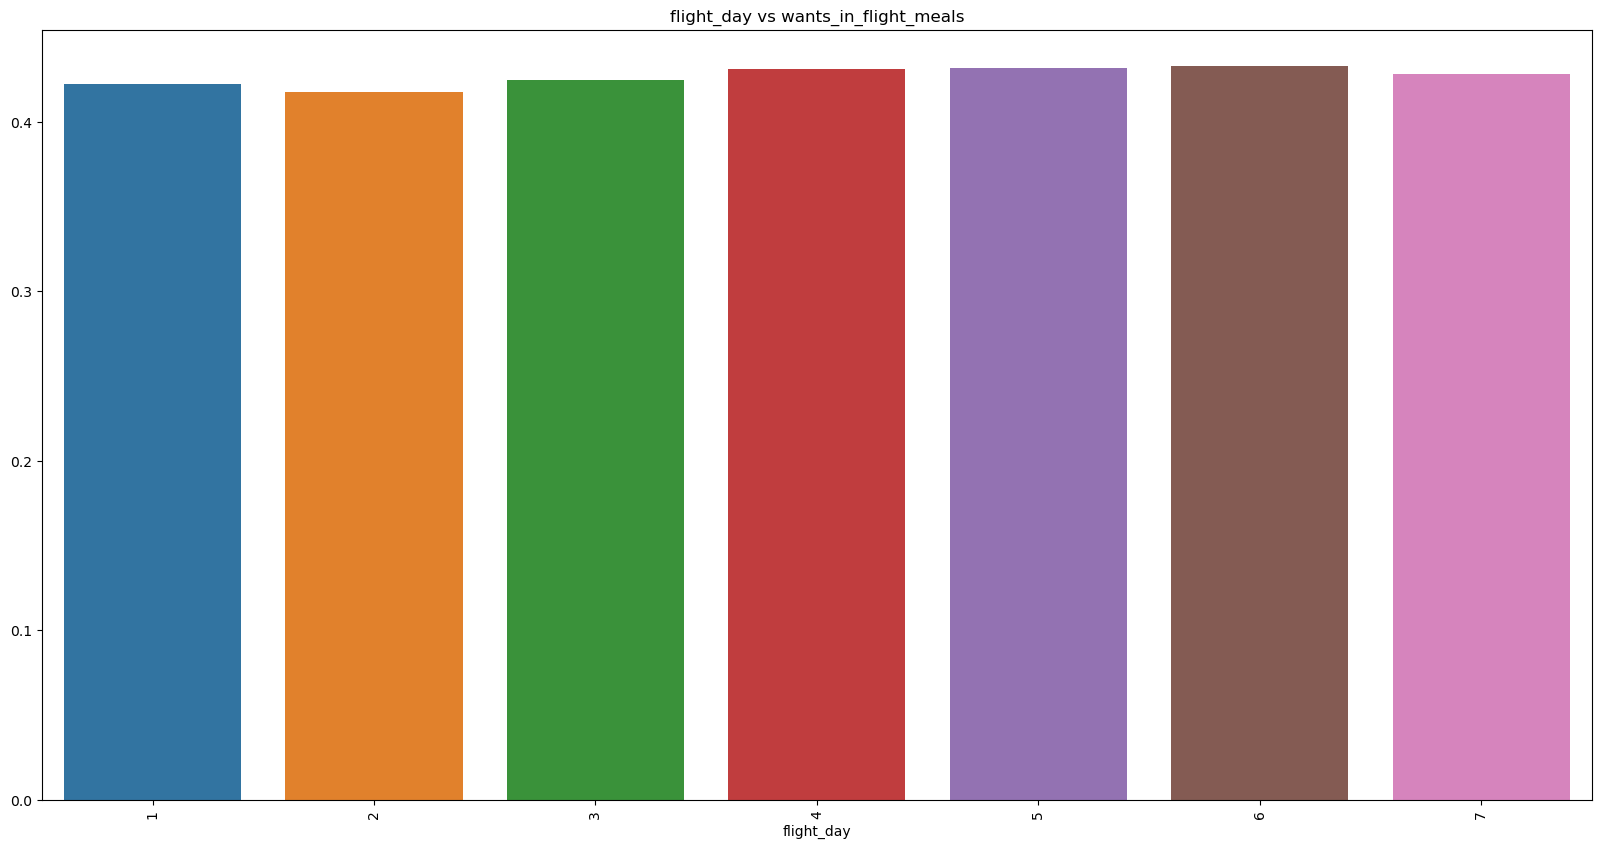

In [30]:
visualize('flight_day','wants_in_flight_meals')

flight_day
1    0.149229
2    0.147623
3    0.162545
4    0.151407
5    0.145914
6    0.149476
7    0.141526
Name: booking_complete, dtype: float64

<Axes: xlabel='flight_day'>

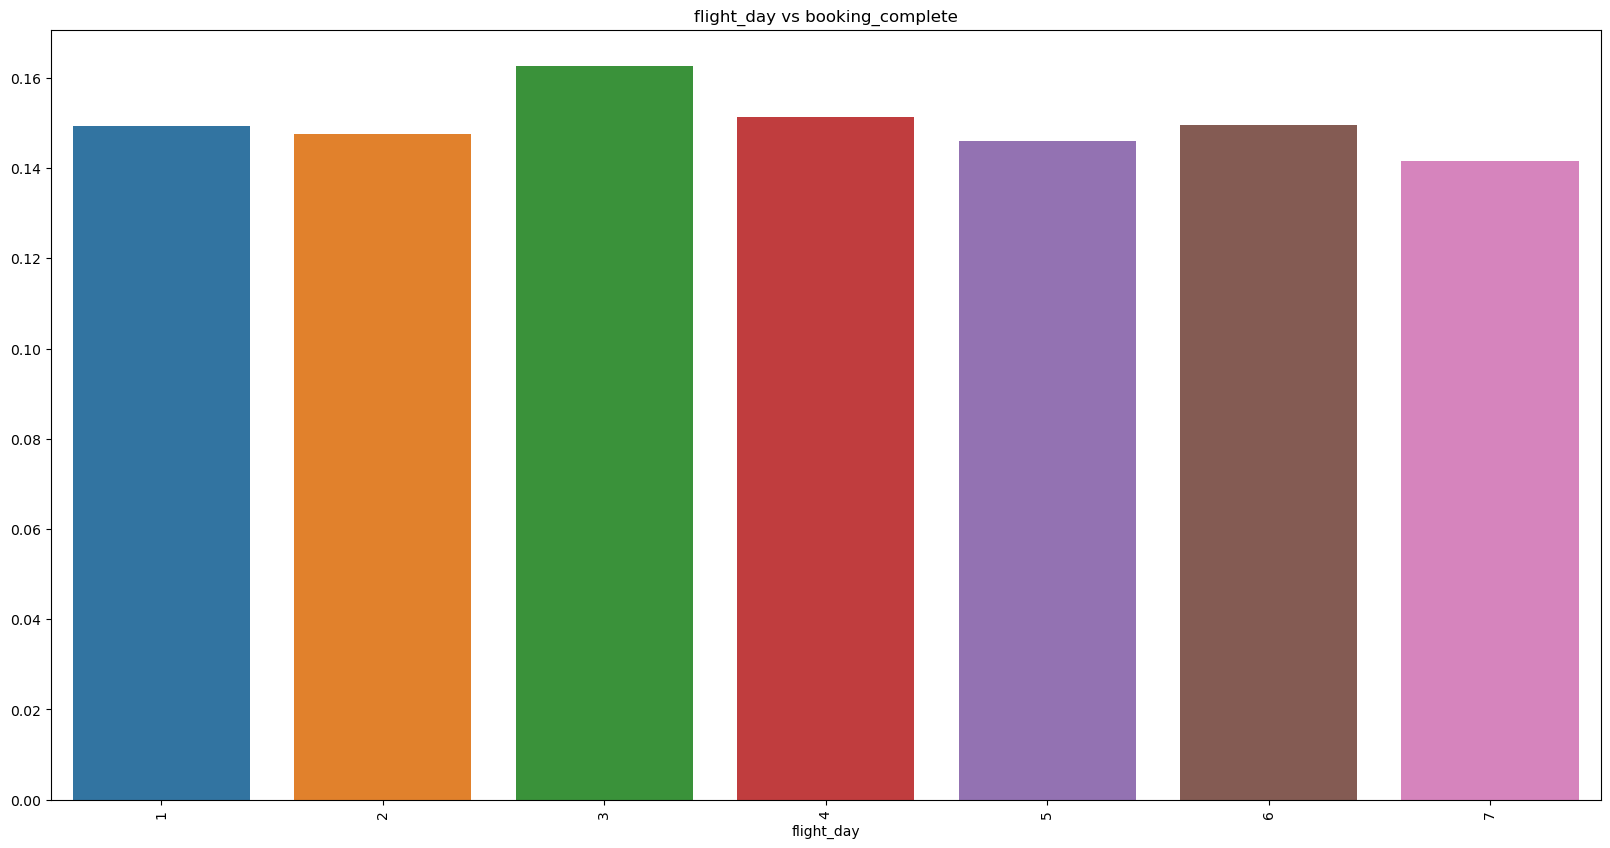

In [31]:
visualize('flight_day','booking_complete')

trip_type
CircleTrip    0.043103
OneWay        0.051813
RoundTrip     0.150954
Name: booking_complete, dtype: float64

<Axes: xlabel='trip_type'>

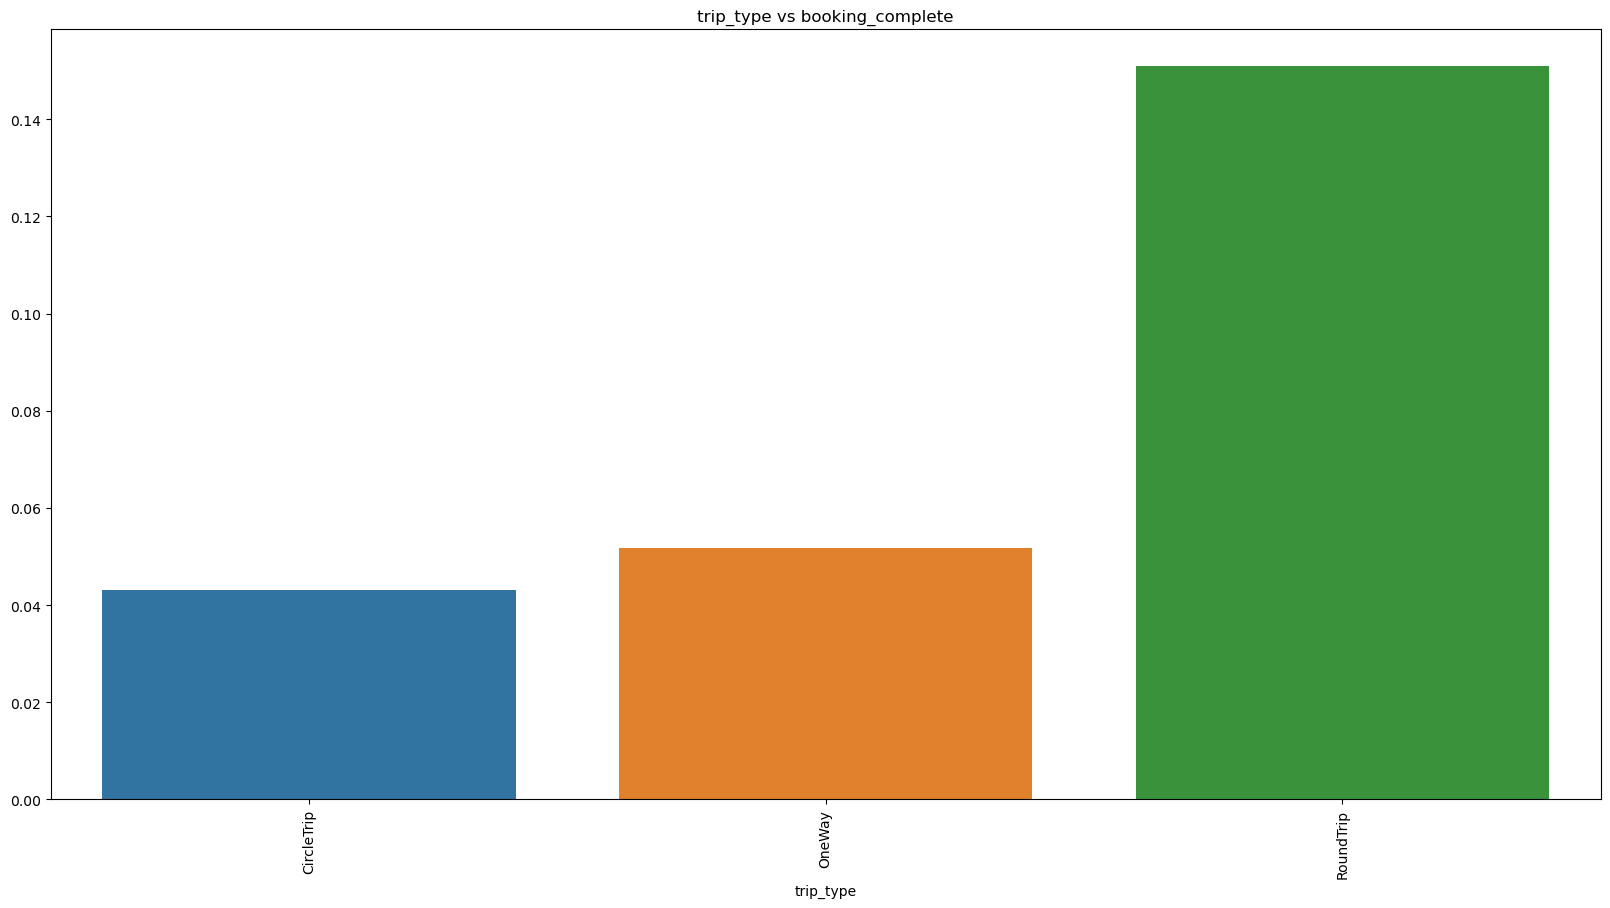

In [32]:
visualize('trip_type','booking_complete')

## Round Trips are the most Favourable

flight_duration
4.67    0.332098
4.72    0.236626
4.75    0.232745
4.83    0.262069
5.00    0.312236
5.07    0.411178
5.13    0.422414
5.33    0.266268
5.52    0.322289
5.62    0.407658
6.33    0.457555
6.42    0.254098
6.62    0.363617
7.00    0.360290
7.42    0.502262
7.57    0.373788
8.15    0.471572
8.58    0.536954
8.67    0.425667
8.83    0.509006
9.50    0.638889
Name: wants_in_flight_meals, dtype: float64

<Axes: xlabel='flight_duration'>

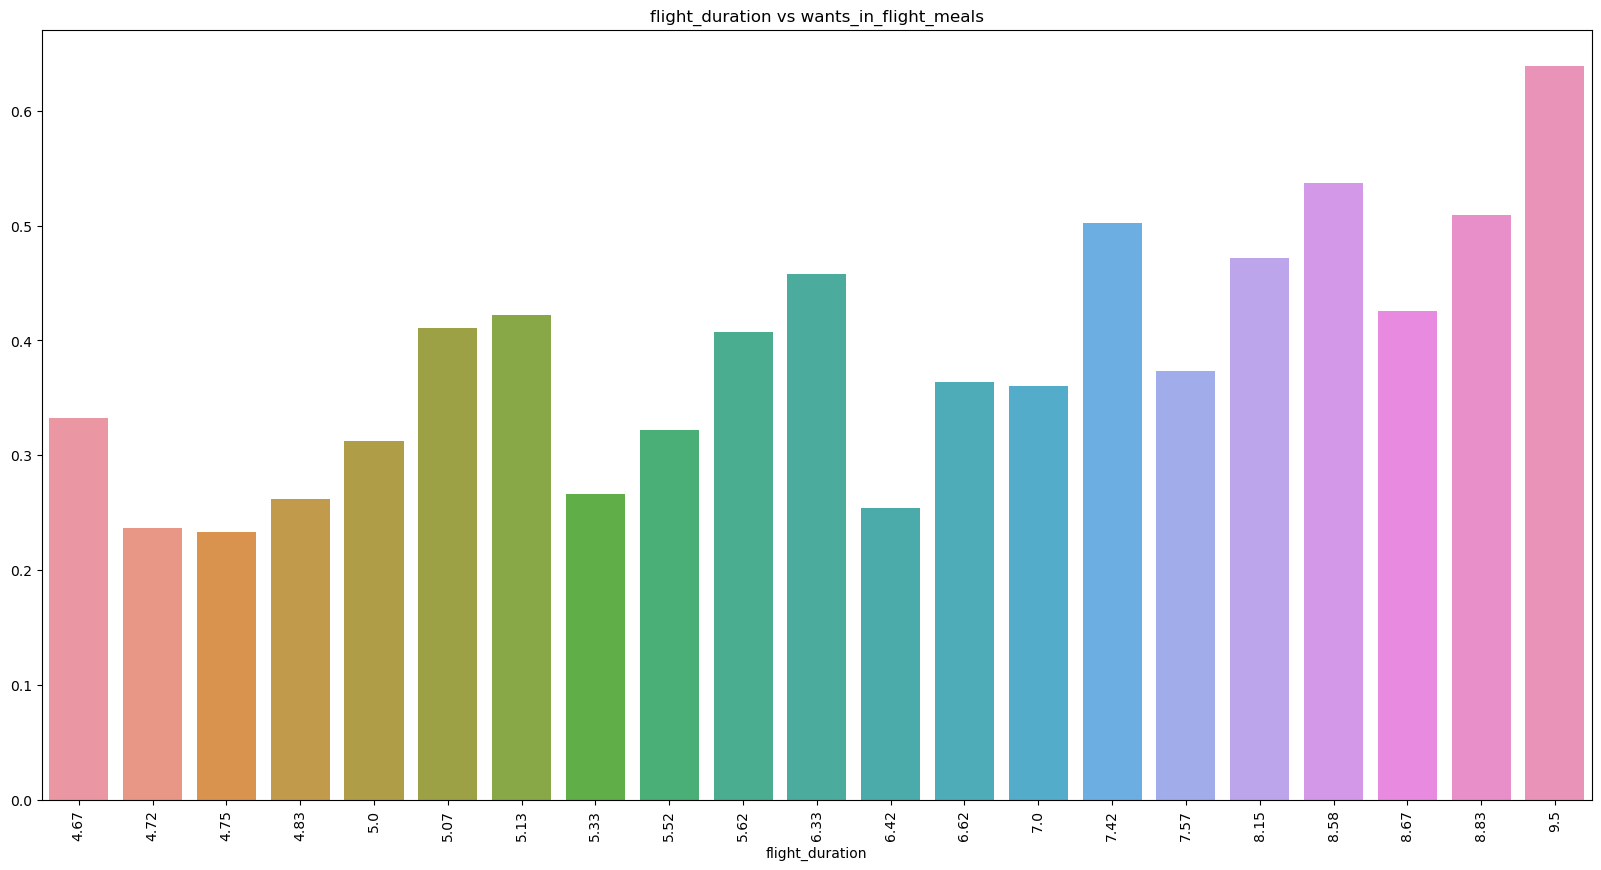

In [33]:
visualize('flight_duration', 'wants_in_flight_meals')

## As the Duration of Flight gets Increased we see an increase for Inflight Meals

sales_channel
Internet    1.592663
Mobile      1.572175
Name: num_passengers, dtype: float64

<BarContainer object of 2 artists>

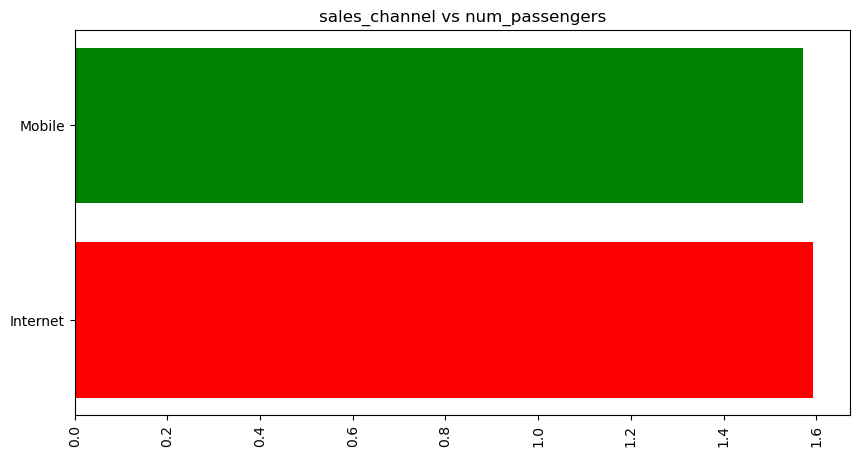

sales_channel
Internet    85.206926
Mobile      80.988997
Name: purchase_lead, dtype: float64

<BarContainer object of 2 artists>

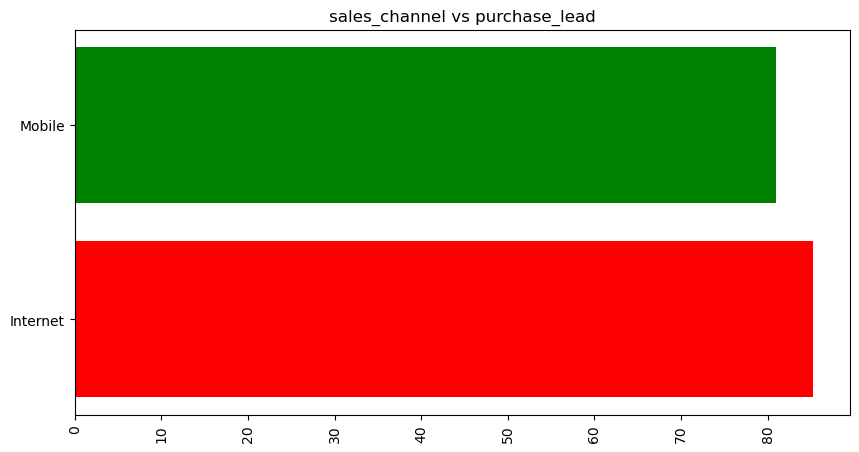

sales_channel
Internet    23.467669
Mobile      17.262216
Name: length_of_stay, dtype: float64

<BarContainer object of 2 artists>

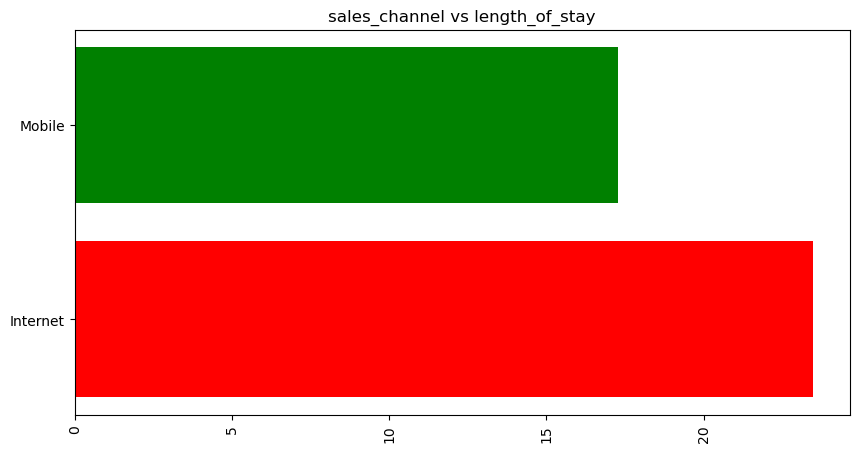

sales_channel
Internet    9.026202
Mobile      9.436218
Name: flight_hour, dtype: float64

<BarContainer object of 2 artists>

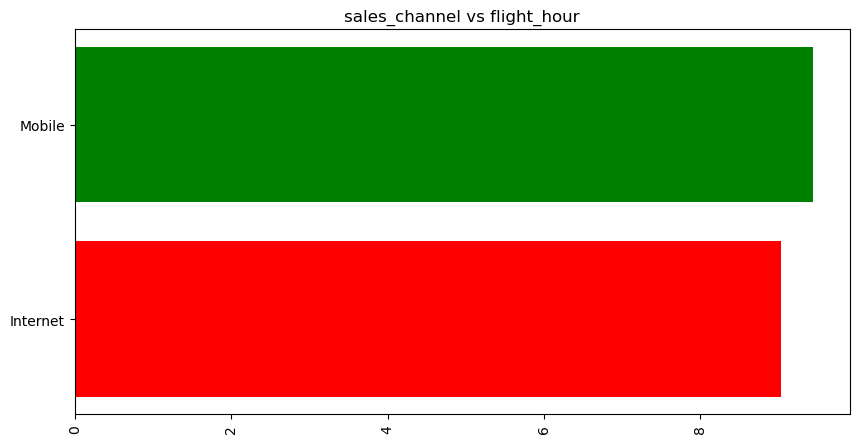

sales_channel
Internet    3.784211
Mobile      4.054830
Name: flight_day, dtype: float64

<BarContainer object of 2 artists>

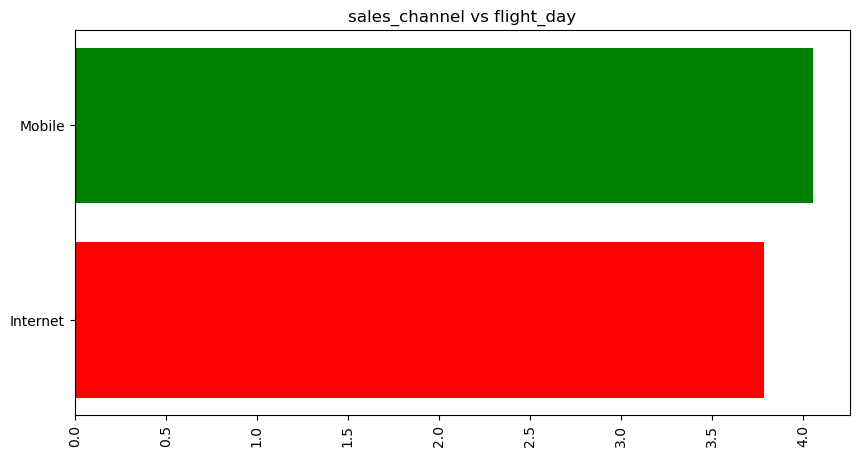

sales_channel
Internet    0.677375
Mobile      0.592876
Name: wants_extra_baggage, dtype: float64

<BarContainer object of 2 artists>

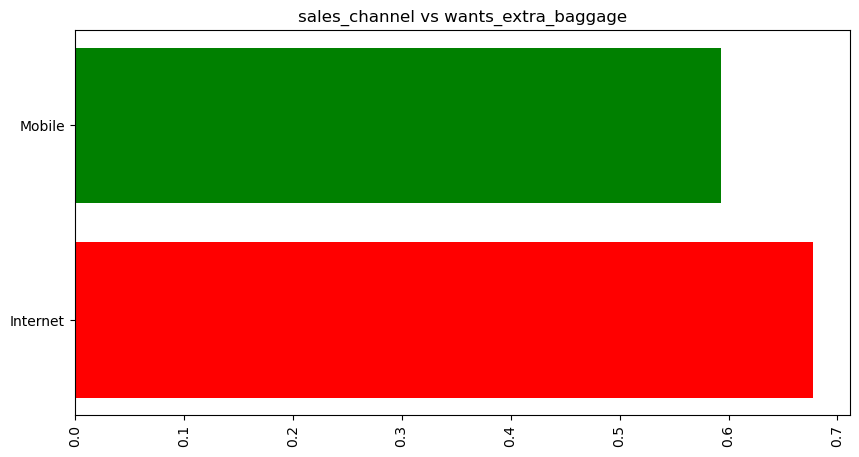

sales_channel
Internet    0.290932
Mobile      0.333644
Name: wants_preferred_seat, dtype: float64

<BarContainer object of 2 artists>

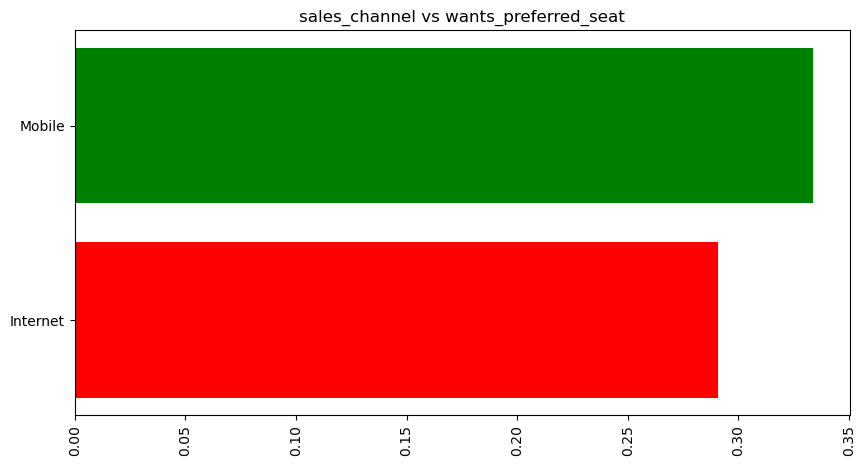

sales_channel
Internet    0.431032
Mobile      0.389780
Name: wants_in_flight_meals, dtype: float64

<BarContainer object of 2 artists>

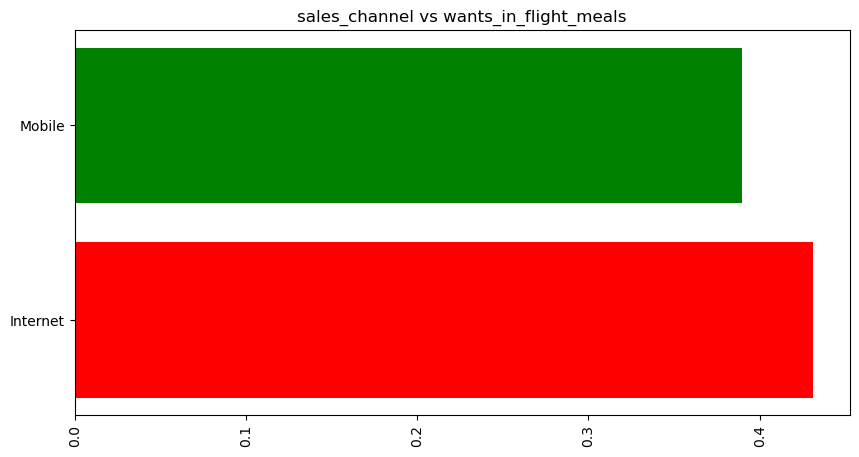

sales_channel
Internet    7.298801
Mobile      7.122907
Name: flight_duration, dtype: float64

<BarContainer object of 2 artists>

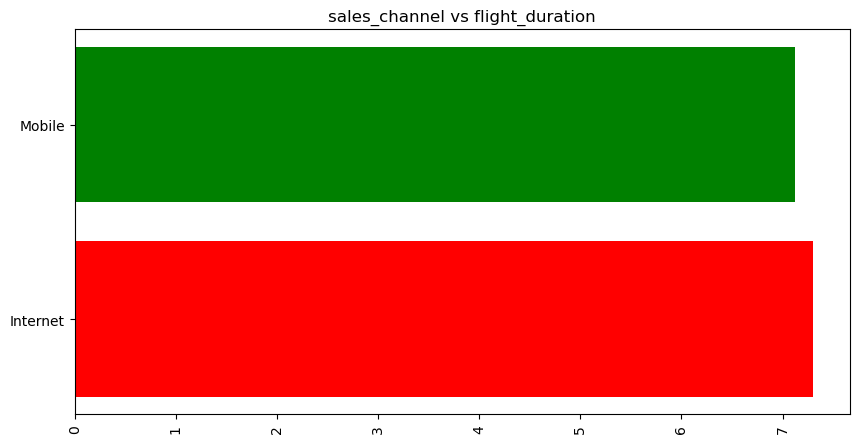

sales_channel
Internet    0.154842
Mobile      0.109661
Name: booking_complete, dtype: float64

<BarContainer object of 2 artists>

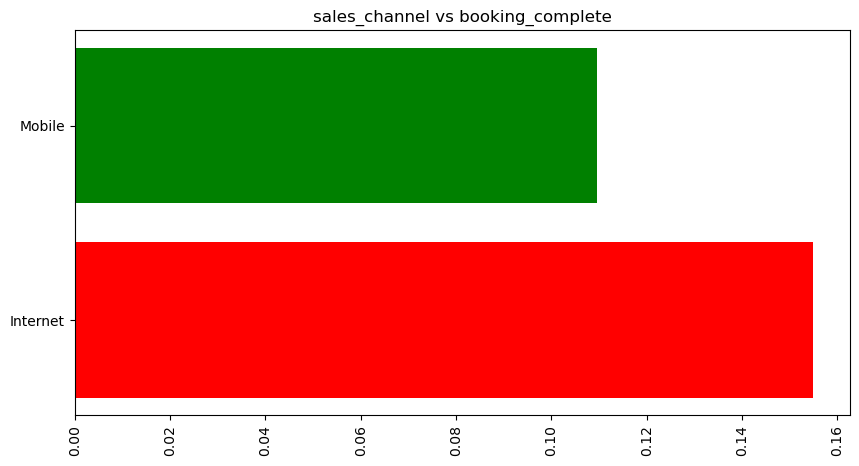

In [34]:
for i in df.select_dtypes(exclude='object').columns:
    display(df.groupby('sales_channel')[i].mean())
    plt.figure(figsize=(10,5))
    display(plt.barh(df.groupby('sales_channel')[i].mean().index,
                     df.groupby('sales_channel')[i].mean().values,
                     color=['r','g']))
    plt.xticks(rotation=90)
    plt.title(f'sales_channel vs {i}')
    plt.show()

## People booking using Internet have Longer Stay, Want extra Baggage and Meals and Complete their Booking More often

## People Using Mobile want Preferred seats and Do not usually Complete their Booking

sales_channel
Internet    43890
Mobile       5362
Name: count, dtype: int64

<Axes: xlabel='sales_channel'>

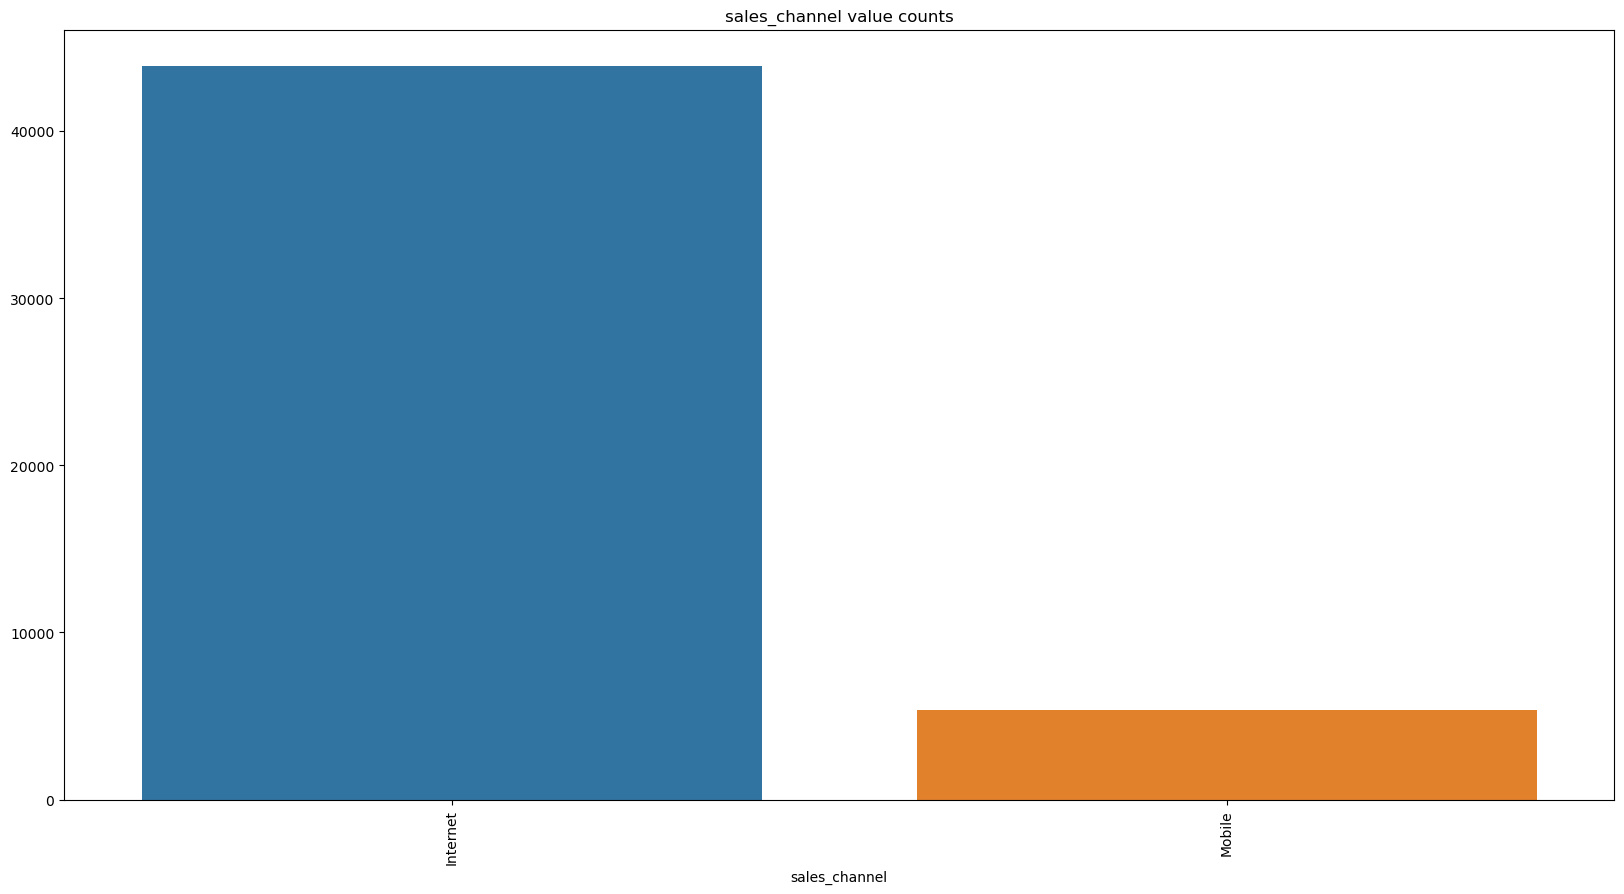

trip_type
RoundTrip     48750
OneWay          386
CircleTrip      116
Name: count, dtype: int64

<Axes: xlabel='trip_type'>

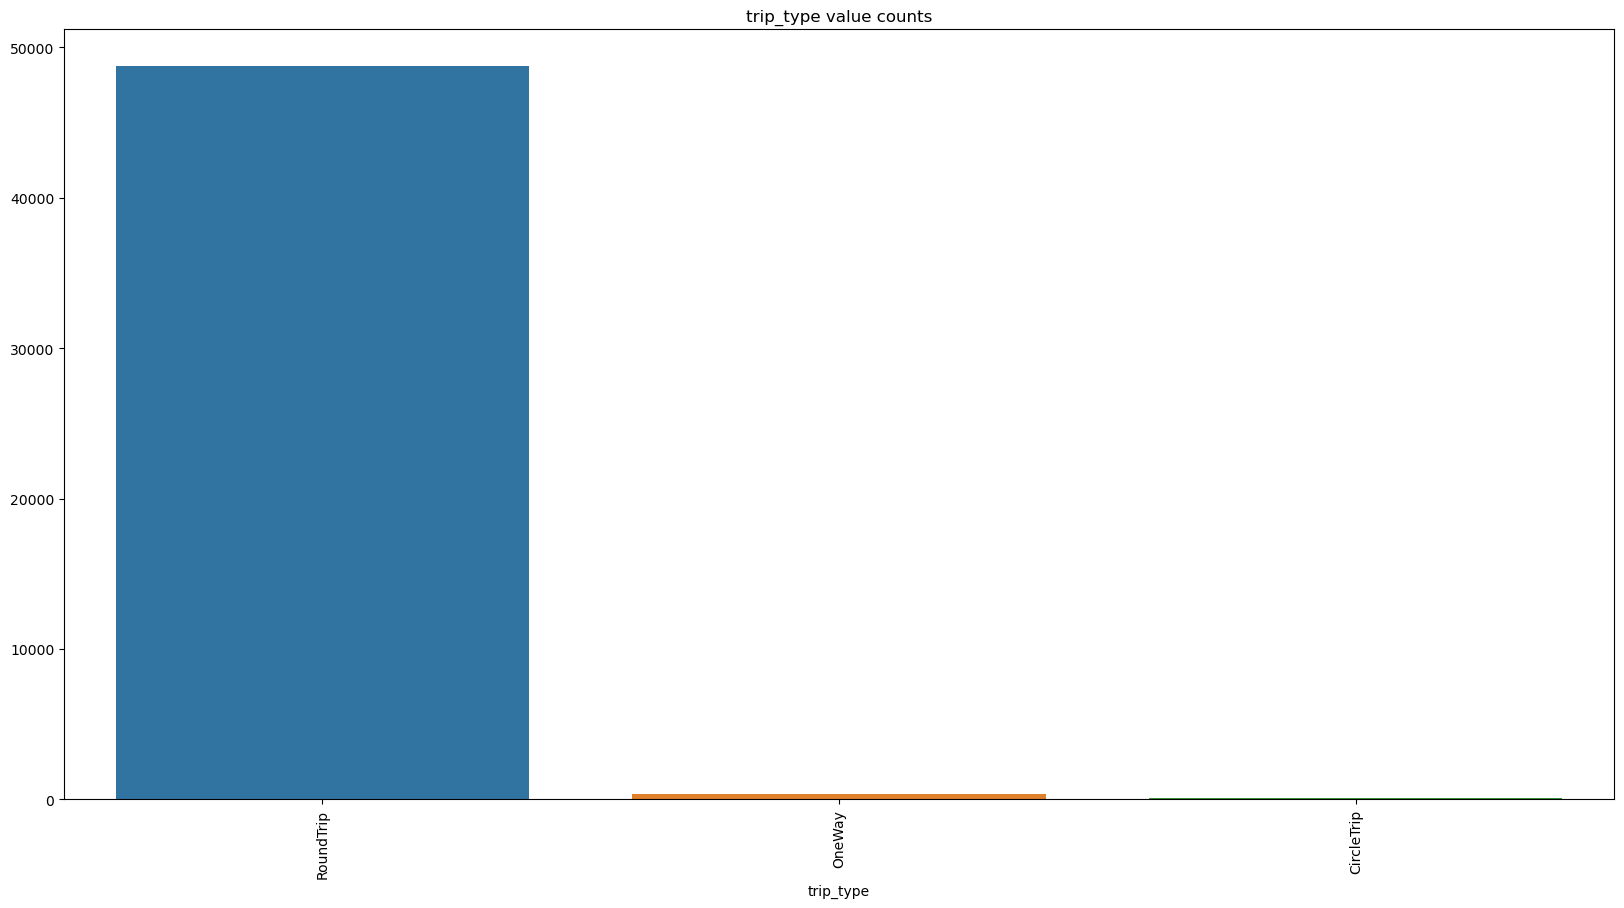

route
AKLKUL    2616
PENTPE     911
MELSGN     831
ICNSIN     792
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

<Axes: xlabel='route'>

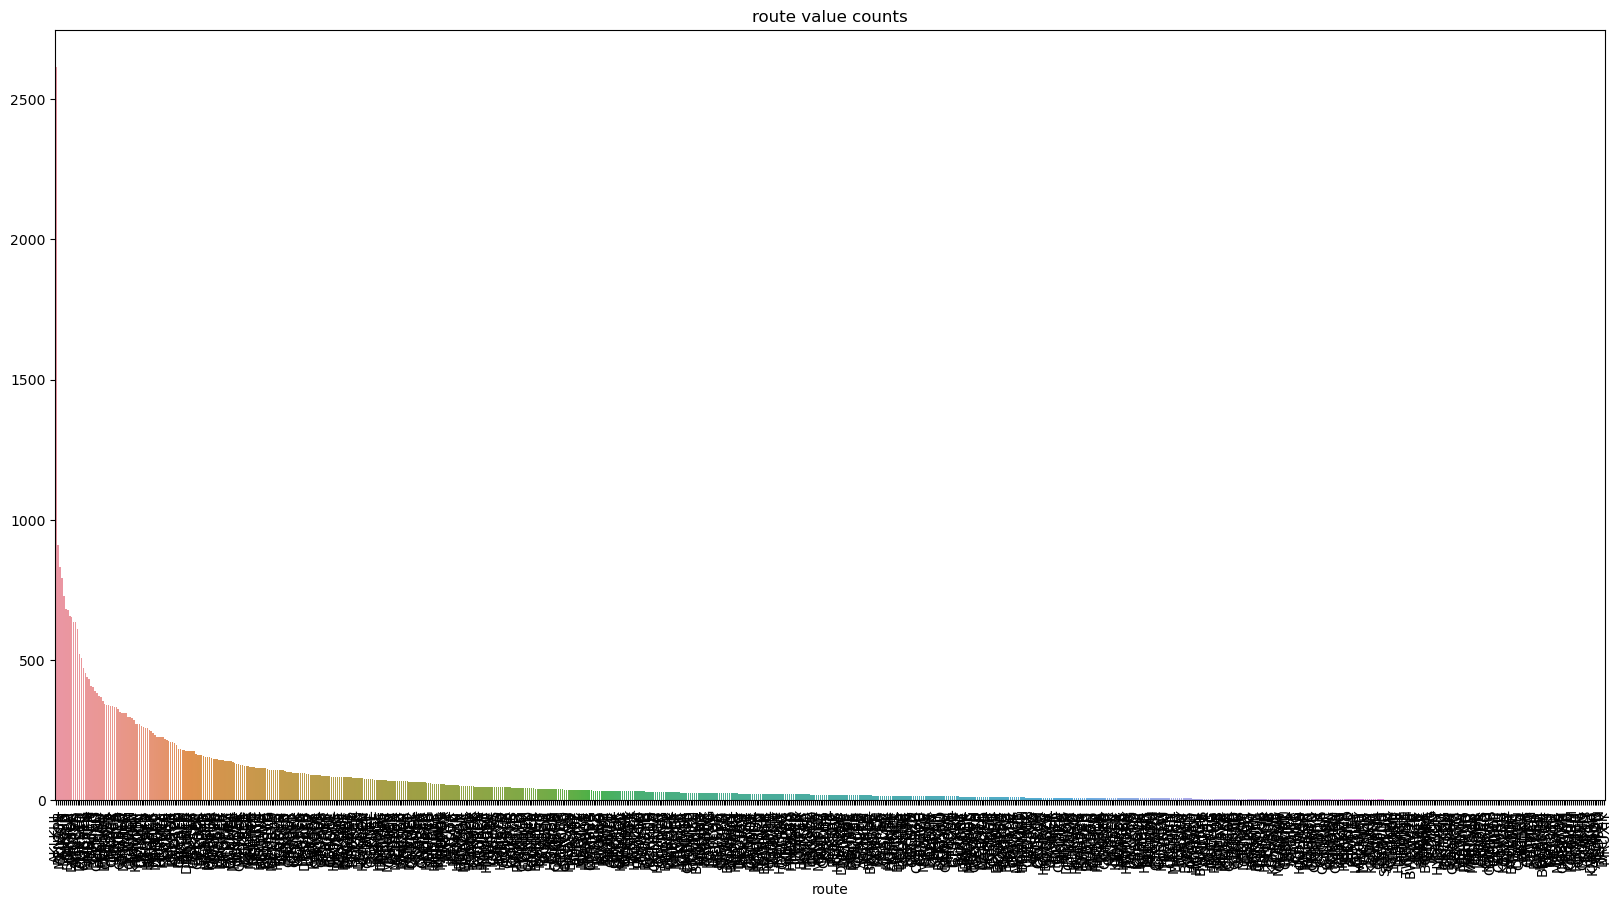

booking_origin
Australia               17679
Malaysia                 7049
South Korea              4499
Japan                    3819
China                    3283
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

<Axes: xlabel='booking_origin'>

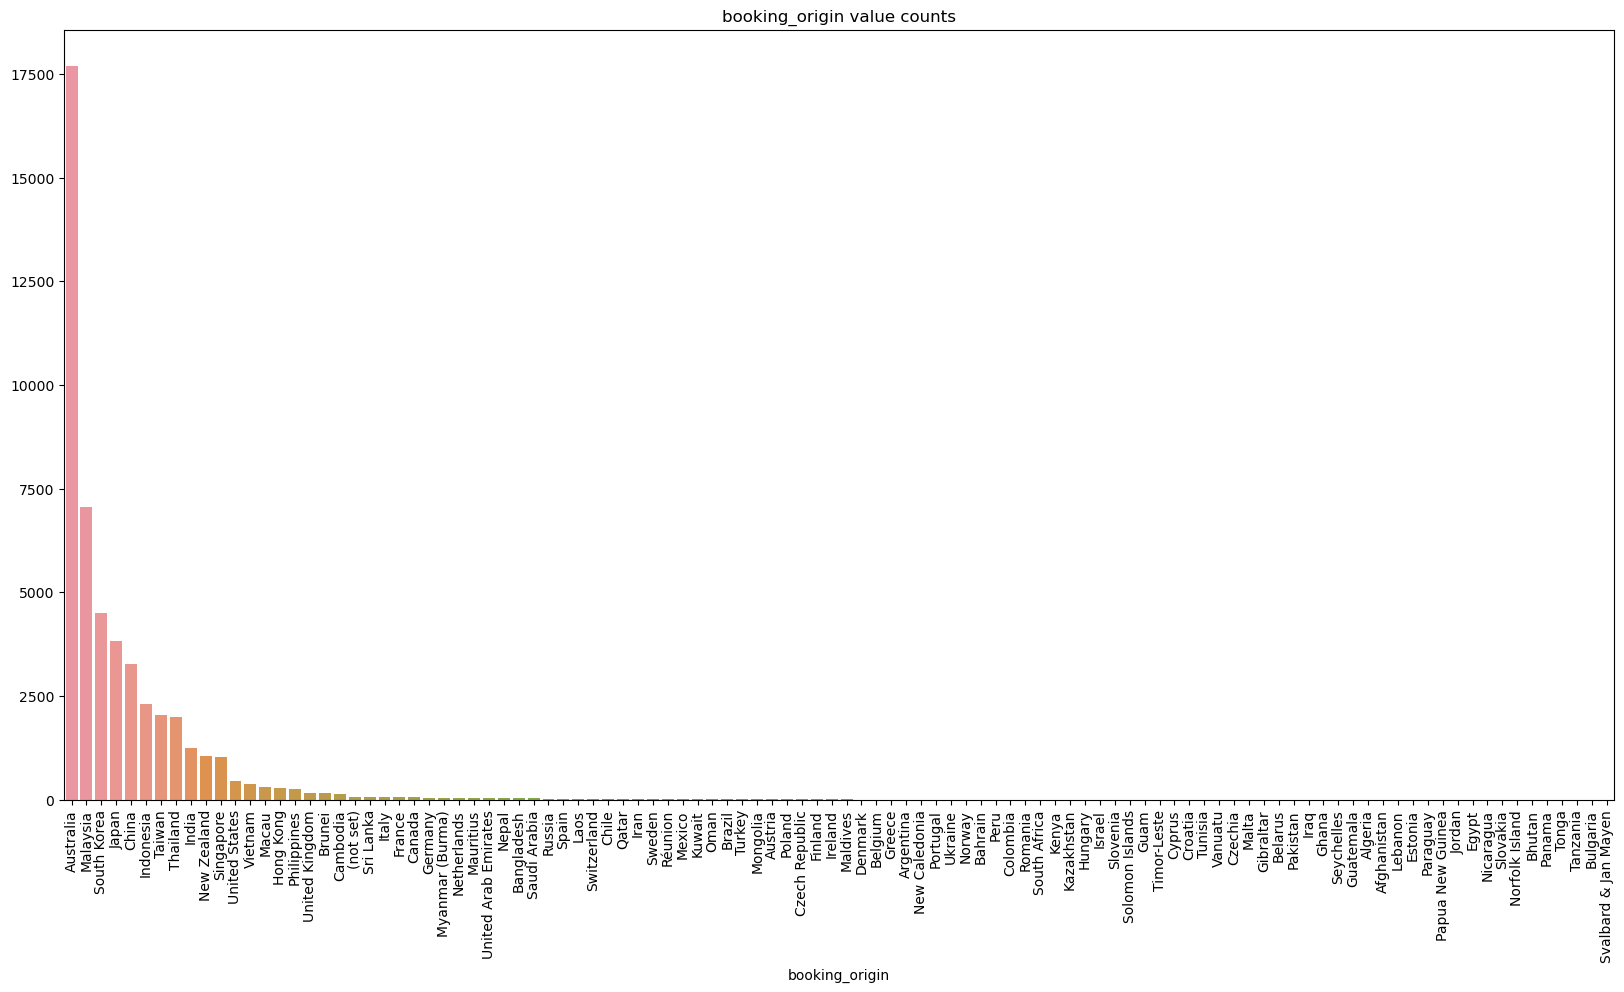

departure_city
DMK    3697
ICN    3678
MEL    3423
DPS    2839
AKL    2784
       ... 
CSX       4
NRT       2
CXR       1
BTJ       1
URT       1
Name: count, Length: 85, dtype: int64

<Axes: xlabel='departure_city'>

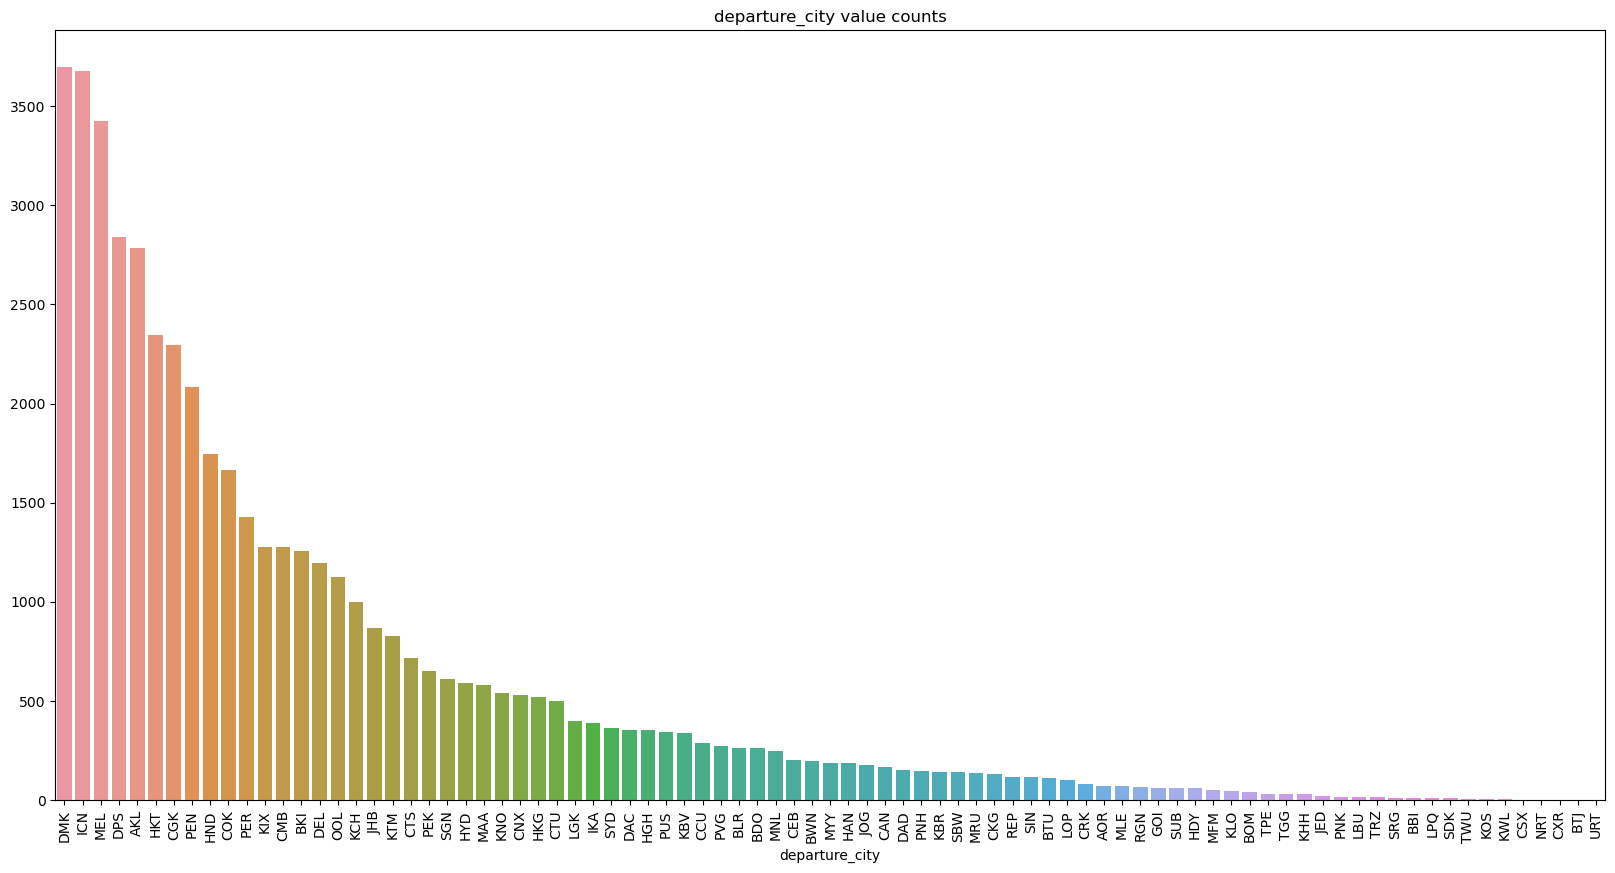

arrival_city
SYD    6538
PER    4937
MEL    4388
TPE    3985
OOL    2775
       ... 
SWA       3
NRT       1
PDG       1
LBU       1
SRG       1
Name: count, Length: 64, dtype: int64

<Axes: xlabel='arrival_city'>

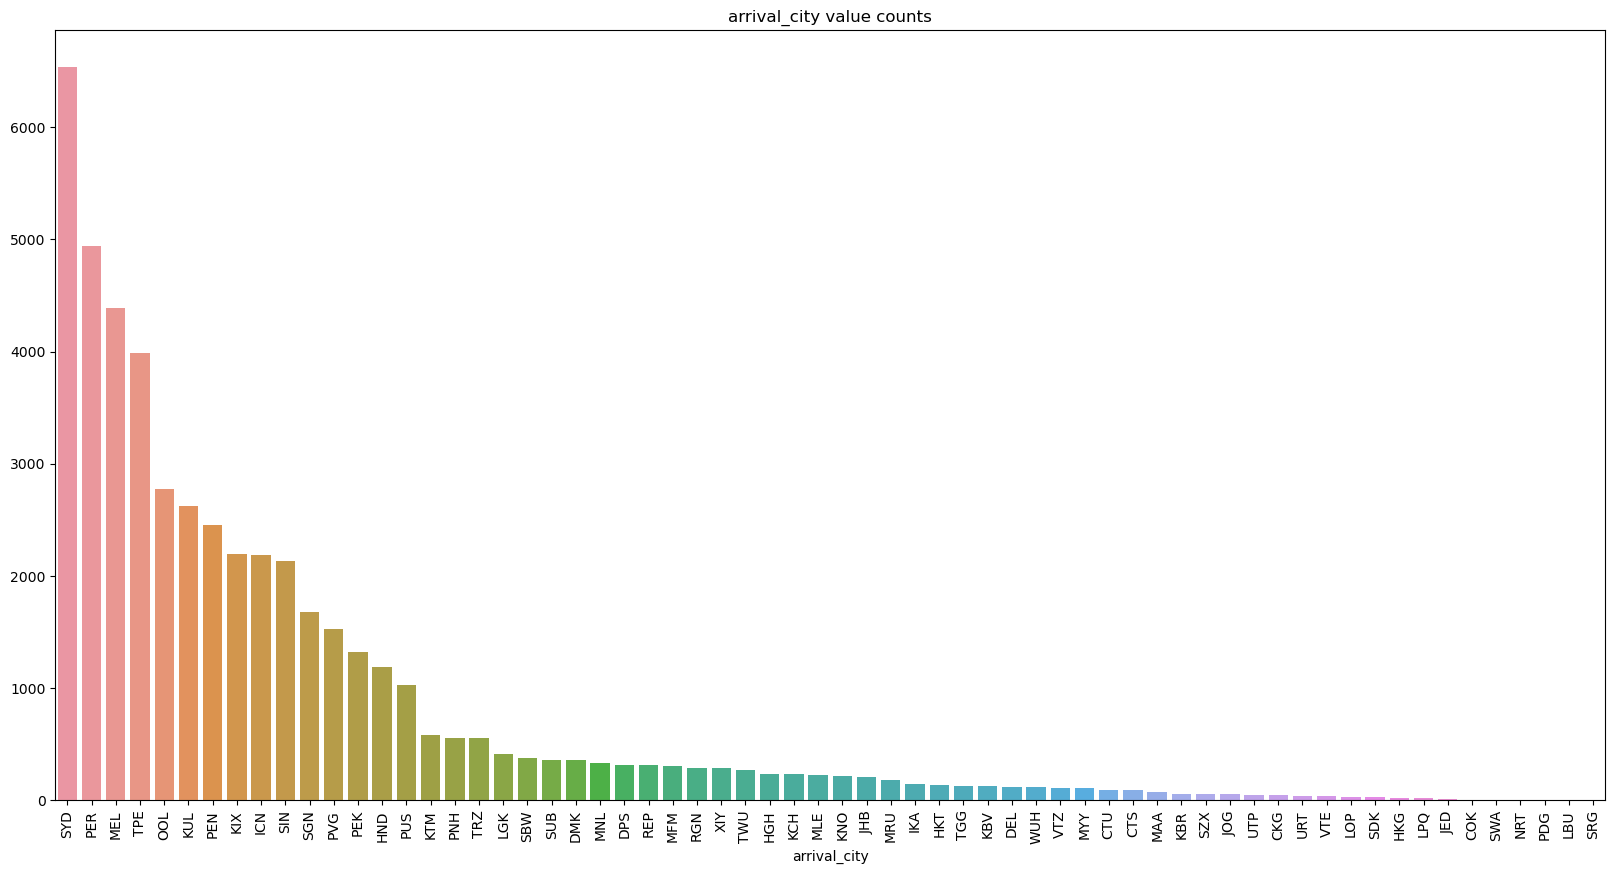

In [35]:
for i in df.select_dtypes(include='object').columns:
    display(df.select_dtypes(include='object')[i].value_counts())
    plt.figure(figsize=(20,10))
    display(sns.barplot(x=df.select_dtypes(include='object')[i].value_counts().index,y=df.select_dtypes(include='object')[i].value_counts().values))
    plt.title(f'{i} value counts')
    plt.xticks(rotation=90)
    plt.show()

## People Prefer using Internet as Sales Channel more than Mobile

## Most Booking Originated from Australia, Malaysia, South Korea, Japan and China  

In [36]:
df['booking_complete'].value_counts()

booking_complete
0    41868
1     7384
Name: count, dtype: int64

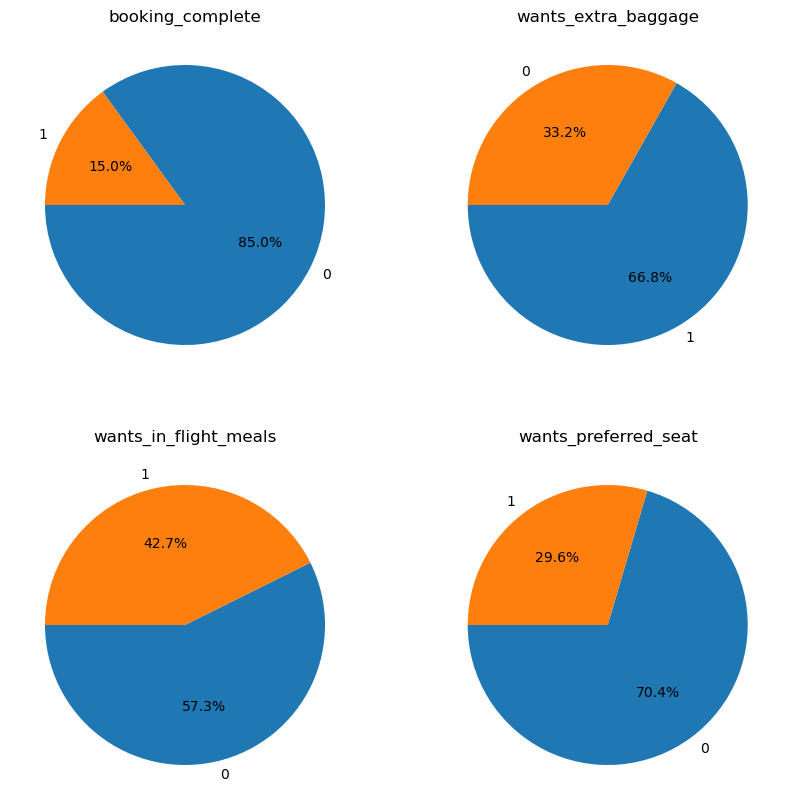

In [37]:
columns=['booking_complete','wants_extra_baggage','wants_in_flight_meals','wants_preferred_seat']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes= axes.flatten()

for i,column in enumerate(columns):
    data = df[column].value_counts()
    axes[i].pie(data, labels=data.index,
        startangle=180, autopct='%1.1f%%')
    axes[i].set_title(f'{column}')
plt.show()

## Only 15% of all Viewers completed their Booking
## A Third of all Customers want Extra Baggage
## Almost Half Require Inflight Meals
## 30% Want Preferred Seats

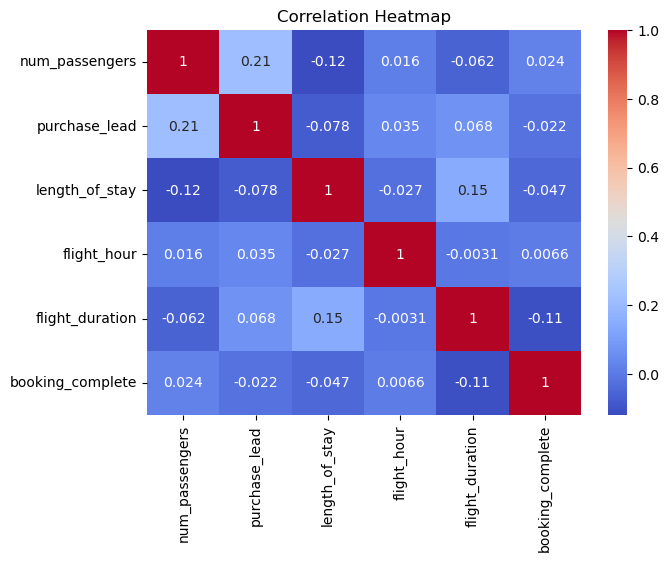

In [38]:
selected_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 
                    'flight_hour', 'flight_duration', 'booking_complete'] 
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### These correlations are generally weak to moderate. Importantly, there is no strong linear relationship between booking completion status and any of these numerical features. This suggests that factors influencing booking completion are likely more complex and multifaceted, necessitating further analysis.

In [39]:
import scipy.stats as ss


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

nominal_categorical_columns = ['sales_channel', 'flight_day', 
                               'booking_origin', 'departure_city', 'arrival_city']  

# Calculate Cramér's V and p-values
for col in nominal_categorical_columns:
    confusion_matrix = pd.crosstab(df[col], df['booking_complete'])
    chi2_stat, p_value, dof, ex = ss.chi2_contingency(confusion_matrix)
    cramers_v_val = cramers_v(df[col], df['booking_complete'])
    print(f"Cramér's V for {col}: {cramers_v_val}, p-value: {p_value}")

Cramér's V for sales_channel: 0.03907003748508346, p-value: 2.589397033407235e-18
Cramér's V for flight_day: 0.013008418127143337, p-value: 0.026116563923095002
Cramér's V for booking_origin: 0.30337056776001725, p-value: 0.0
Cramér's V for departure_city: 0.2287506721416428, p-value: 0.0
Cramér's V for arrival_city: 0.19902220101448956, p-value: 0.0


### Among the variables tested, booking_origin, departure_city, and arrival_city have relatively high Cramér's V values (0.302, 0.229, and 0.197, respectively), indicating significant associations with booking completion.

# Data Preprocessing

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import recall_score, precision_score, f1_score

In [41]:
df_model = df.drop(columns=['flight_day', 'route', 'trip_type', 'sales_channel', 'flight_hour'], axis=1)
#df_model=df.copy()

In [42]:
def one_hot_encode_with_others(df, column, max_categories):
    # Get the top categories
    top_categories = df[column].value_counts().index[:max_categories]

    # Replace categories not in the top list with 'Others'
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Others')

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=[column], prefix=[column], prefix_sep='_')

    return df_encoded

# List of categorical columns and their maximum categories
categorical_columns_max_categories = {
    'booking_origin': 10,
    'departure_city': 20,
    'arrival_city': 20
}

# Perform one-hot encoding for each categorical column with specified maximum categories
for column, max_categories in categorical_columns_max_categories.items():
    df_model = one_hot_encode_with_others(df_model, column, max_categories)

In [43]:
x, y = df_model.drop('booking_complete',axis=1), df['booking_complete']

In [44]:
#numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']
numerical_columns = x.select_dtypes(include='number').columns
scaler = StandardScaler()
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [45]:
df_model.head()

,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_Australia,booking_origin_China,...,arrival_city_PER,arrival_city_PNH,arrival_city_PUS,arrival_city_PVG,arrival_city_SBW,arrival_city_SGN,arrival_city_SIN,arrival_city_SYD,arrival_city_TPE,arrival_city_TRZ
0,2,262,19,1,0,0,5.52,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,0,0,0,5.52,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,1,1,0,5.52,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,0,0,1,5.52,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,1,0,1,5.52,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [47]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [69]:
def modelling(model):
    model_ = model
    model_ = model_.fit(x_train, y_train)
    return model_

def metrics_train(x_train, y_train, model_, model_name):
    y_pred_train = model_.predict(x_train)
    y_pred_prob_train = model_.predict_proba(x_train)[:, 1]
    accuracy = accuracy_score(y_train, y_pred_train)
    conf_matrix = confusion_matrix(y_train, y_pred_train)
    classification_rep = classification_report(y_train, y_pred_train, zero_division=1)
    roc_auc = roc_auc_score(y_train, y_pred_prob_train)
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'AUC-ROC Score: {roc_auc:.2f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    
def metrics_test(x_test, y_test, model_, model_name)  :  
    y_pred_test = model_.predict(x_test)
    y_pred_prob_test = model_.predict_proba(x_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    classification_rep = classification_report(y_test, y_pred_test, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_prob_test)
    F1 = f1_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    precision = precision_score(y_test, y_pred_test, average='weighted')
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'AUC-ROC Score: {roc_auc:.2f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    
    print (f'\nF1 score:{F1}')
    print (f'\nRecall:{recall}')
    print (f'\nPrecision:{precision}')

In [49]:
dt_clr=modelling(DecisionTreeClassifier())

In [50]:
dt_clr_train = metrics_train(x_train, y_train, dt_clr, 'DecisionTreeClassifier')

Model: DecisionTreeClassifier
Accuracy: 0.9980203548133296
AUC-ROC Score: 1.00
Confusion Matrix:
[[33468     4]
 [   74  5855]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33472
           1       1.00      0.99      0.99      5929

    accuracy                           1.00     39401
   macro avg       1.00      0.99      1.00     39401
weighted avg       1.00      1.00      1.00     39401



In [51]:
dt_clr_test = metrics_test(x_test, y_test, dt_clr, 'DecisionTreeClassifier')

Model: DecisionTreeClassifier
Accuracy: 0.778804182316516
AUC-ROC Score: 0.58
Confusion Matrix:
[[7238 1158]
 [1021  434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8396
           1       0.27      0.30      0.28      1455

    accuracy                           0.78      9851
   macro avg       0.57      0.58      0.58      9851
weighted avg       0.79      0.78      0.78      9851



In [52]:
rf_clr=modelling(RandomForestClassifier())

In [53]:
rf_clr_train = metrics_test(x_train, y_train, rf_clr, 'RandomForestClassifier')

Model: RandomForestClassifier
Accuracy: 0.9979442146138423
AUC-ROC Score: 1.00
Confusion Matrix:
[[33448    24]
 [   57  5872]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33472
           1       1.00      0.99      0.99      5929

    accuracy                           1.00     39401
   macro avg       1.00      0.99      1.00     39401
weighted avg       1.00      1.00      1.00     39401



In [54]:
rf_clr_test = metrics_train(x_test, y_test, rf_clr, 'RandomForestClassifier')

Model: RandomForestClassifier
Accuracy: 0.8361587656075525
AUC-ROC Score: 0.74
Confusion Matrix:
[[7974  422]
 [1192  263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8396
           1       0.38      0.18      0.25      1455

    accuracy                           0.84      9851
   macro avg       0.63      0.57      0.58      9851
weighted avg       0.80      0.84      0.81      9851



### Random Forest classifier achieved an accuracy of 83.6% and an AUC-ROC score of 0.74. While the accuracy is relatively high, indicating a strong ability to correctly predict whether a booking will be completed or not, the AUC-ROC score suggests there is room for improvement in distinguishing between the positive and negative classes.

In [55]:
x = df_model.drop(columns=['booking_complete'])
y = df_model['booking_complete']

# Split the data into training and testing sets with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameters and their ranges for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
grid_search = GridSearchCV(estimator=rf_clr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [57]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
best_rf_clr=modelling(RandomForestClassifier(**best_params))

In [64]:
best_rf_clr_train = metrics_train(x_train, y_train, best_rf_clr, 'RandomForestClassifier')

Model: RandomForestClassifier
Accuracy: 0.8638359432501713
AUC-ROC Score: 0.90
Confusion Matrix:
[[33417    77]
 [ 5288   619]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     33494
           1       0.89      0.10      0.19      5907

    accuracy                           0.86     39401
   macro avg       0.88      0.55      0.56     39401
weighted avg       0.87      0.86      0.82     39401



In [70]:
best_rf_clr_test = metrics_test(x_test, y_test, best_rf_clr, 'RandomForestClassifier')

Model: RandomForestClassifier
Accuracy: 0.8494569079281291
AUC-ROC Score: 0.78
Confusion Matrix:
[[8311   63]
 [1420   57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8374
           1       0.47      0.04      0.07      1477

    accuracy                           0.85      9851
   macro avg       0.66      0.52      0.49      9851
weighted avg       0.80      0.85      0.79      9851


F1 score:0.7911390318282345

Recall:0.8494569079281291

Precision:0.7972384284236105


### After cross-validation and hyperparameter tuning, the accuracy improved to 84.93%. The AUC-ROC score also increased from 0.74 to 0.78, indicating a good—but not excellent—ability to discriminate between the two classes. The confusion matrix, visualized in the heatmap, illustrates a substantial number of true negatives (8307), confirming the model's strength in correctly identifying non-completions. However, there is a notable area for improvement in predicting the minority class, with a relatively low number of true positives (60) compared to false negatives (1417). This suggests that while the model excels in predicting non-completions, it tends to misclassify actual completions as non-completions.

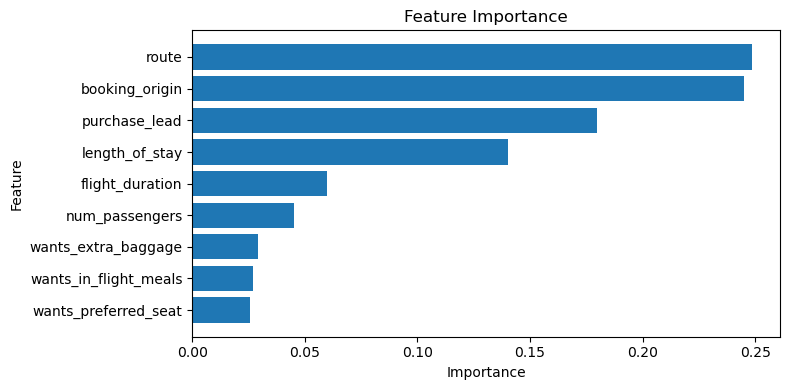

In [61]:
feature_importances = best_rf_clr.feature_importances_

# Create a DataFrame to associate importances with column names
importance_df = pd.DataFrame({'Column': x.columns, 'Importance': feature_importances})

# Calculate cumulative sum of importance 
booking_origin_cumulative = importance_df[importance_df['Column'].str.startswith('booking')]['Importance'].sum()
arrival_city_cumulative = importance_df[importance_df['Column'].str.startswith('arrival')]['Importance'].sum()
departure_city_cumulative = importance_df[importance_df['Column'].str.startswith('departure')]['Importance'].sum()

cumulative_importance_df = pd.DataFrame({'Column': ['booking_origin', 'route'],
                                         'Importance': [booking_origin_cumulative, 
                                                        (arrival_city_cumulative + departure_city_cumulative)]
                                        })

# Exclude cumulative features from the main importance_df
importance_df = importance_df[~importance_df['Column'].str.startswith('booking')]
importance_df = importance_df[~importance_df['Column'].str.startswith('arrival')]
importance_df = importance_df[~importance_df['Column'].str.startswith('departure')]

# Concatenate importance_df with cumulative_importance_df
importance_df = pd.concat([importance_df, cumulative_importance_df], ignore_index=True)

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the most important features
plt.figure(figsize=(8, 4))
plt.barh(importance_df['Column'][::-1], importance_df['Importance'][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importance')
plt.tight_layout()
plt.show()

From the plot, it's evident that booking_origin and route are the most significant features, indicating that where a booking is made and the specific journey it entails are paramount in determining the likelihood of booking completion. Factors such as purchase_lead and length_of_stay also play substantial roles, suggesting that the timing of the purchase and the duration of the intended stay are critical considerations for customers. Less impactful, yet still influential, are flight_duration, num_passengers, wants_extra_baggage, and wants_in_flight_meals, which align with intuitive expectations about customer preferences and choices.

## Conclusion

### This comprehensive analysis successfully developed a RandomForest machine learning model to predict customer booking behaviors for British Airways. The model, optimized through grid search and validated with performance metrics, demonstrated a notable accuracy of 85% and AUC of 0.78. The study highlighted booking_origin and route as pivotal factors in booking completion.

### However, it's crucial to note that due to the limited dataset and class imbalance, further improvements in accuracy were constrained. Addressing class imbalance and augmenting the dataset with additional data points could potentially enhance the model's predictive capabilities.This model not only offers predictive insights but also serves as a strategic tool for enhancing customer engagement and operational efficiency in the airline industry.